# Fundamentos de Análisis de Datos - Reservas de Hoteles

## 1. Control de Versiones

Con el objetivo de organizarnos mejor y llevar un control de versiones a lo largo del proyecto, previniendo así cualquier error o complicación que se nos pueda presentar, se ha utilizado github, donde hemos creado un [repositorio] para el equipo.

[repositorio]: https://github.com/Moscow-Mavericks/Moscow_Mavericks/tree/develop

## 2. Definición de Objetivos

El proyecto se basa en explorar el conjunto de datos de "**hotels**", el cual representa las reservas de un hotel de ciudad y de un hotel turístico con información como la fecha de la reserva, la duración de la estancia, el número de adultos, niños y/o bebés y el número de plazas de aparcamiento disponibles, entre otras variables de importancia en el ámbito.

A partir de está exploración, el objetivo es realizar una **regresión lineal** de tal forma que se pueda predecir el **número de noches reservadas**. Cabe destacar que principalmente se pensó en centrarnos en la variable **is_canceled** para predecir cuando una reserva sería cancelada, pero según se fue avanzando en el proyecto se vió más oportuno dejar esa variable para una futura regresión logística.

Resumen de objetivos:
* Analizar el conjunto de datos **hotels**.
* Realizar tratamiento de los **datos faltantes** de dicho conjunto de datos.
* **Tratar las variablas** (tanto cualitativas como cuantitativas) de forma adecuada para su futuro uso en el modelo de regresión lineal.
* **Seleccionar las variables** más oportunas para obtener un modelo óptimo.
* Crear un modelo de **regresión lineal** centrándonos en el número de noches a reservar.
* Realizar **diagnosis** basándonos en dicho modelo.


* **Todos los objetivos a su vez se centran en aplicar los conocimientos vistos durante esta asignatura para asimilarlos y comprenderlos de la mejor manera posible.**

## 3. Análisis Exploratorio

En primer lugar realizaremos un analisis exploratorio de  nuestra base de datos, con ello buscamos explorar, describir, resumir y visualizar la naturaleza de los datos recogidos en las variables del proyecto o investigación de interés, mediante la aplicación de técnicas simples de resumen de datos y métodos gráficos sin tomar asunciones para su interpretación.

### 3.1 Librerias


In [1]:
import pandas as pd
import numpy as np
import pandas_profiling
import io
import warnings
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import seaborn as sns
warnings.filterwarnings('ignore')
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from missingpy import KNNImputer

### 3.2 Datos


Realizaremos la lectura de los datos haciendo uso de la libreria Pandas, la cual recoge las mayoria de funcionalidades necesarias durante esta etapa del proyecto. Además realizaremos un hed para comproibar que los datos se encuentran correctamente leidos.

In [2]:
data = pd.read_csv('simple-hotels.csv')
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,City Hotel,1,177,2017,August,33,17,2,5,3,...,No Deposit,9.0,NaN,0,Transient,164.44,0,0,Canceled,2017-02-24
1,Resort Hotel,0,8,2017,February,7,17,1,2,2,...,No Deposit,250.0,NaN,0,Transient,67.00,1,0,Check-Out,2017-02-20
2,City Hotel,1,181,2017,June,23,8,0,2,2,...,Non Refund,58.0,NaN,0,Transient,100.00,0,0,Canceled,2017-01-24
3,City Hotel,0,45,2016,November,48,25,1,2,2,...,No Deposit,NaN,NaN,0,Transient-Party,90.00,0,0,Check-Out,2016-11-28
4,City Hotel,1,64,2017,July,30,23,2,1,2,...,No Deposit,14.0,NaN,0,Transient,174.33,0,1,Canceled,2017-05-22


Pasamos a mostrar los tipos, buscando posibles irregularidades en la lectura que sean fácilmente apreciables

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           10000 non-null  object 
 1   is_canceled                     10000 non-null  int64  
 2   lead_time                       10000 non-null  int64  
 3   arrival_date_year               10000 non-null  int64  
 4   arrival_date_month              10000 non-null  object 
 5   arrival_date_week_number        10000 non-null  int64  
 6   arrival_date_day_of_month       10000 non-null  int64  
 7   stays_in_weekend_nights         10000 non-null  int64  
 8   stays_in_week_nights            10000 non-null  int64  
 9   adults                          10000 non-null  int64  
 10  children                        10000 non-null  float64
 11  babies                          10000 non-null  int64  
 12  meal                            1

Vamos a observar un resumen sobre las variables numéricas:

In [4]:
data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,8654.000000,559.000000,10000.000000,10000.000000,10000.00000,10000.000000
mean,0.375100,105.393800,2016.166900,27.267700,15.864100,0.927100,2.516500,1.869600,0.108000,0.008500,0.031900,0.087500,0.127400,0.218700,89.090941,188.869410,2.201200,102.150192,0.06440,0.579300
std,0.484173,108.267682,0.705616,13.671588,8.725941,0.990396,1.882892,0.572912,0.405157,0.093961,0.175743,0.852242,1.269067,0.684045,112.721390,138.001931,17.405235,48.778734,0.24629,0.797731
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,49.000000,0.000000,68.530000,0.00000,0.000000
50%,0.000000,70.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,174.000000,0.000000,94.000000,0.00000,0.000000
75%,1.000000,164.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,280.000000,0.000000,126.000000,0.00000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,10.000000,25.000000,27.000000,3.000000,2.000000,1.000000,26.000000,60.000000,16.000000,531.000000,530.000000,391.000000,388.000000,2.00000,5.000000


Mostramos la matriz de correlación entre las variables. Posteriormente en la selección de variables se volverá a mostrar para realizar una mejor selección.

In [5]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.300322,0.024577,-0.002117,-0.009072,-0.006372,0.019155,0.068910,0.013710,-0.030521,-0.079520,0.105622,-0.070294,-0.126024,-0.083498,0.022658,0.057597,0.049155,-0.202595,-0.238465
lead_time,0.300322,1.000000,0.039142,0.125362,-0.002752,0.093504,0.172592,0.123425,-0.039498,-0.015174,-0.116012,0.081086,-0.084707,0.003191,-0.074082,0.168360,0.165606,-0.064772,-0.119927,-0.103249
arrival_date_year,0.024577,0.039142,1.000000,-0.539884,-0.001400,0.028002,0.042828,0.028113,0.056933,-0.009332,-0.007453,-0.122741,0.029414,0.035844,0.073102,0.259735,-0.050217,0.217300,-0.011788,0.104497
arrival_date_week_number,-0.002117,0.125362,-0.539884,1.000000,0.064799,0.018045,0.011346,0.029802,-0.002981,0.004690,-0.040559,0.029336,-0.030383,-0.002817,-0.028062,-0.078391,0.011536,0.069965,-0.000309,0.023936
arrival_date_day_of_month,-0.009072,-0.002752,-0.001400,0.064799,1.000000,-0.031836,-0.027325,0.009958,-0.000346,-0.008105,-0.004933,-0.020335,0.011733,0.017864,0.013063,0.037240,0.034493,0.030133,0.005841,-0.003962
stays_in_weekend_nights,-0.006372,0.093504,0.028002,0.018045,-0.031836,1.000000,0.496751,0.090233,0.048036,0.023855,-0.088915,-0.017917,-0.055550,0.043907,0.162056,0.080099,-0.065167,0.062446,-0.017652,0.070293
stays_in_week_nights,0.019155,0.172592,0.042828,0.011346,-0.027325,0.496751,1.000000,0.089143,0.039615,0.040191,-0.097247,-0.018070,-0.053741,0.090570,0.197426,0.199179,-0.003306,0.063893,-0.016310,0.067509
adults,0.068910,0.123425,0.028113,0.029802,0.009958,0.090233,0.089143,1.000000,0.042151,0.013161,-0.147407,-0.005715,-0.127632,-0.033894,-0.044185,0.227391,-0.010477,0.247537,0.010616,0.119568
children,0.013710,-0.039498,0.056933,-0.002981,-0.000346,0.048036,0.039615,0.042151,1.000000,0.046815,-0.038558,-0.027081,-0.025207,0.052975,0.037633,0.002325,-0.033715,0.354569,0.029514,0.100985
babies,-0.030521,-0.015174,-0.009332,0.004690,-0.008105,0.023855,0.040191,0.013161,0.046815,1.000000,-0.010366,-0.008040,-0.009082,0.086219,0.033853,-0.023846,-0.011381,0.044477,0.062776,0.114425


Juntamos las columnas de año, mes y dia para crear un único datetime.

También añadimos una columna con el mes de forma numérica para usarlas posteriormente.

In [6]:
data['arrival_datetime'] = pd.to_datetime(data['arrival_date_year'].map(str) + "-" + data['arrival_date_month'].map(str) + "-" + data['arrival_date_day_of_month'].map(str))
data['arrival_month'] = data['arrival_datetime'].map(str).str[5:7]

In [7]:
data = data.sort_values(by=['arrival_datetime'], ascending=True)
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_datetime,arrival_month
8095,City Hotel,0,257,2015,July,27,1,0,2,2,...,NaN,0,Transient,101.5,0,0,Check-Out,2015-07-03,2015-07-01,07
5423,City Hotel,0,257,2015,July,27,1,0,2,2,...,NaN,0,Transient,101.5,0,0,Check-Out,2015-07-03,2015-07-01,07
1182,City Hotel,0,257,2015,July,27,1,0,2,1,...,NaN,0,Transient,80.0,0,0,Check-Out,2015-07-03,2015-07-01,07
5157,City Hotel,0,257,2015,July,27,1,0,2,2,...,NaN,0,Transient,101.5,0,0,Check-Out,2015-07-03,2015-07-01,07
5772,City Hotel,0,257,2015,July,27,1,0,2,2,...,NaN,0,Transient,101.5,0,0,Check-Out,2015-07-03,2015-07-01,07


Agrupamos los datos por la fecha total, y por año y mes para estudiar los cambios a lo largo del tiempo.

In [8]:
data_groupby_year_month = data.groupby(by=["arrival_date_year", "arrival_date_month"])
data_groupby_date = data.groupby(by=["arrival_datetime"])

#### 3.2.1 Hotel
Tipo de hotel.
Primero comenzamos observando la columna de tipo de hotel.



In [9]:
data['hotel'].describe()

count          10000
unique             2
top       City Hotel
freq            6564
Name: hotel, dtype: object

Como vemos, solo hay dos tipos distintos de hoteles, y el más repetido es el "City Hotel".



<AxesSubplot:>

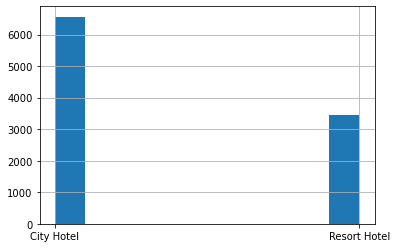

In [10]:
data['hotel'].hist()

##### Tabla de contingencias

In [11]:
pd.crosstab(data['hotel'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)


is_canceled,0,1
hotel,,
City Hotel,0.578458,0.421542
Resort Hotel,0.713620,0.286380


Creamos una tabla de contiengencias observando los porcentajes, de tal forma que se puede ver que el porcentaje de cancelados es mayor en "City Hotel".


##### Evolución Histórica
Ahora vamos a obtener columnas númericas a partir de la columna "hotel" (**one hot encoder**) para poder agrupar cuantos hoteles se reservan cada mes.


In [12]:
data_hotel_and_date = data[['arrival_date_year', 'arrival_month', 'hotel']]
data_hotel_and_date = pd.get_dummies(data_hotel_and_date, columns=["hotel"])[['arrival_date_year', 'arrival_month', 'hotel_City Hotel', 'hotel_Resort Hotel']]
data_hotel_and_date = data_hotel_and_date.groupby(by=['arrival_date_year', 'arrival_month']).sum()
data_hotel_and_date

hotel_City Hotel  hotel_Resort Hotel
arrival_date_year arrival_month                                      
2015              07                        122.0               111.0
                  08                        195.0               117.0
                  09                        276.0               132.0
                  10                        283.0               133.0
                  11                         89.0                86.0
                  12                        137.0               113.0
2016              01                        113.0                65.0
                  02                        172.0               136.0
                  03                        263.0               137.0
                  04                        300.0               155.0
                  05                        279.0               166.0
                  06                        318.0               115.0
                  07                        250.0               121.0
                  08                        277.0               137.0
                  09                        332.0               145.0
                  10                        347.0               183.0
                  11                        258.0               118.0
                  12                        225.0               131.0
2017              01                        220.0               106.0
                  02                        194.0               142.0
                  03                        330.0               131.0
                  04                        327.0               143.0
                  05                        343.0               158.0
                  06                        325.0               134.0
                  07                        298.0               177.0
                  08                        291.0               144.0

<Figure size 36000x720 with 0 Axes>

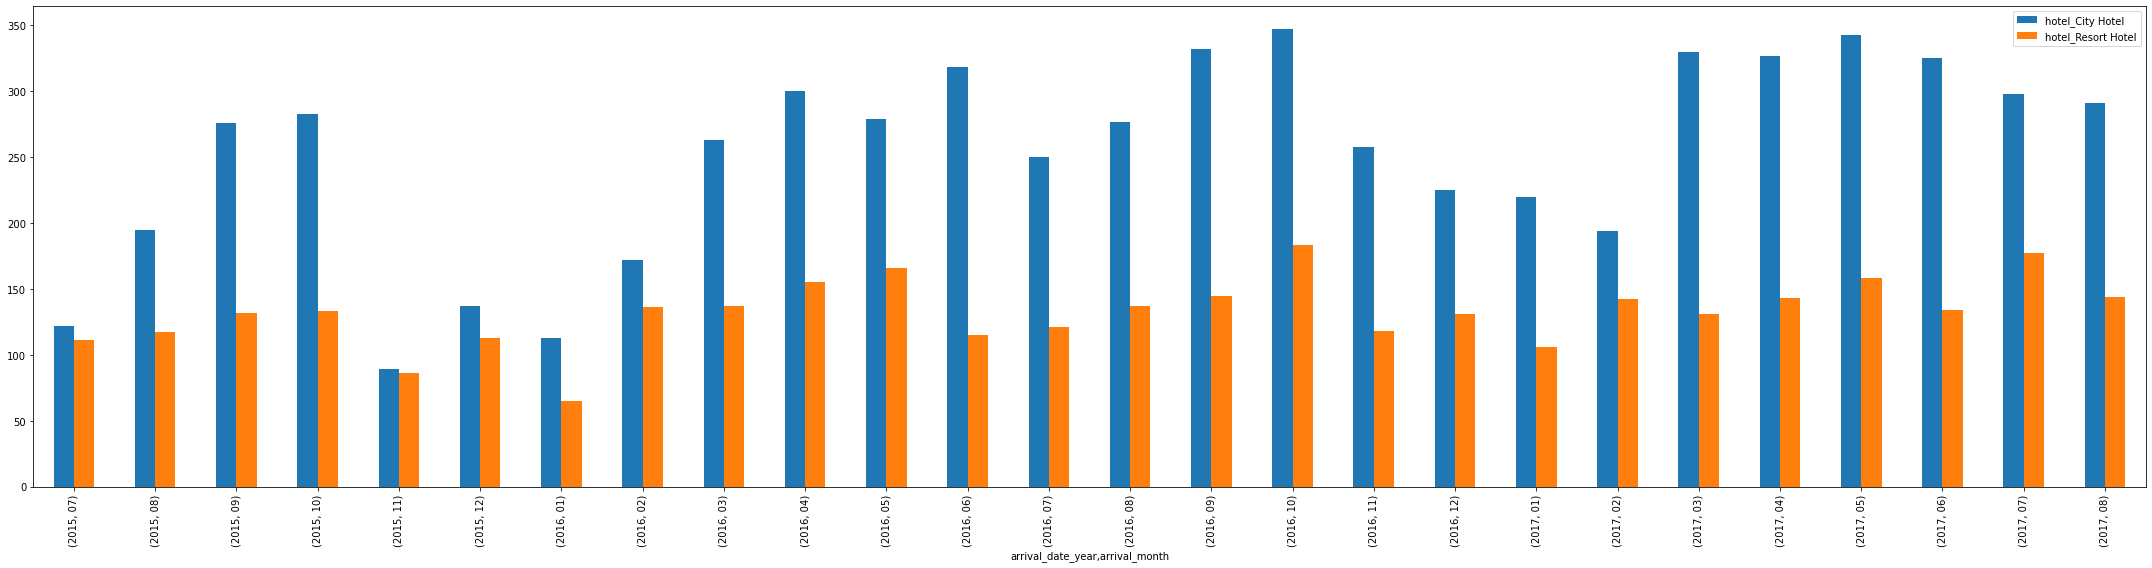

In [13]:
plt.figure(figsize=(500,10));
data_hotel_and_date.plot.bar(figsize=(30,8));
plt.tight_layout()

#### 3.2.2 Is canceled

Se trata de unas de las variables más importantes, pues sería interesante tratar de predecirla en un futuro. En ella se recoge si la reserva ha sido o no cancelada.

In [14]:
data['is_canceled'].describe()

count    10000.000000
mean         0.375100
std          0.484173
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: is_canceled, dtype: float64

Haciendo uso de un histograma, comprobaremos la masa de cada una de las posibles categorias de nuestra variable objetivo, en este caso, podemos observar que en nuestro sample de 10k elementos, la variable no es equitativa, esto es factor a tener en cuenta en un futuro entrenamiento de modelo, puesto que son datos desbalanceados

<AxesSubplot:>

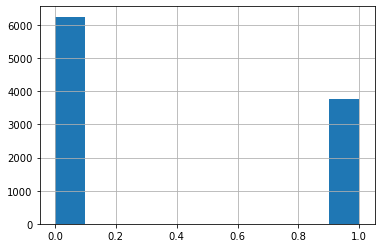

In [15]:
data['is_canceled'].hist()

##### Evolución histórica

Pasamos a comprobar si existe alguna posible relación con el año, buscando posibles incidencias que nos permitan vislumbrar comportamientos anómalos

In [16]:
data_canceled_and_date = data[['arrival_date_year', 'arrival_month', 'is_canceled']].groupby(by=['arrival_date_year', 'arrival_month']).sum()
data_canceled_and_date.head()

is_canceled
arrival_date_year arrival_month             
2015              07                     106
                  08                     139
                  09                     167
                  10                     129
                  11                      43

Podemos observar que las cancelaciones parecen seguir un ciclo temporal, siendo mayores en las etapas veraniegas frente a las invernales. Esta relación puede constituir un síntoma de importancia a la hora de la predicción.

<Figure size 36000x720 with 0 Axes>

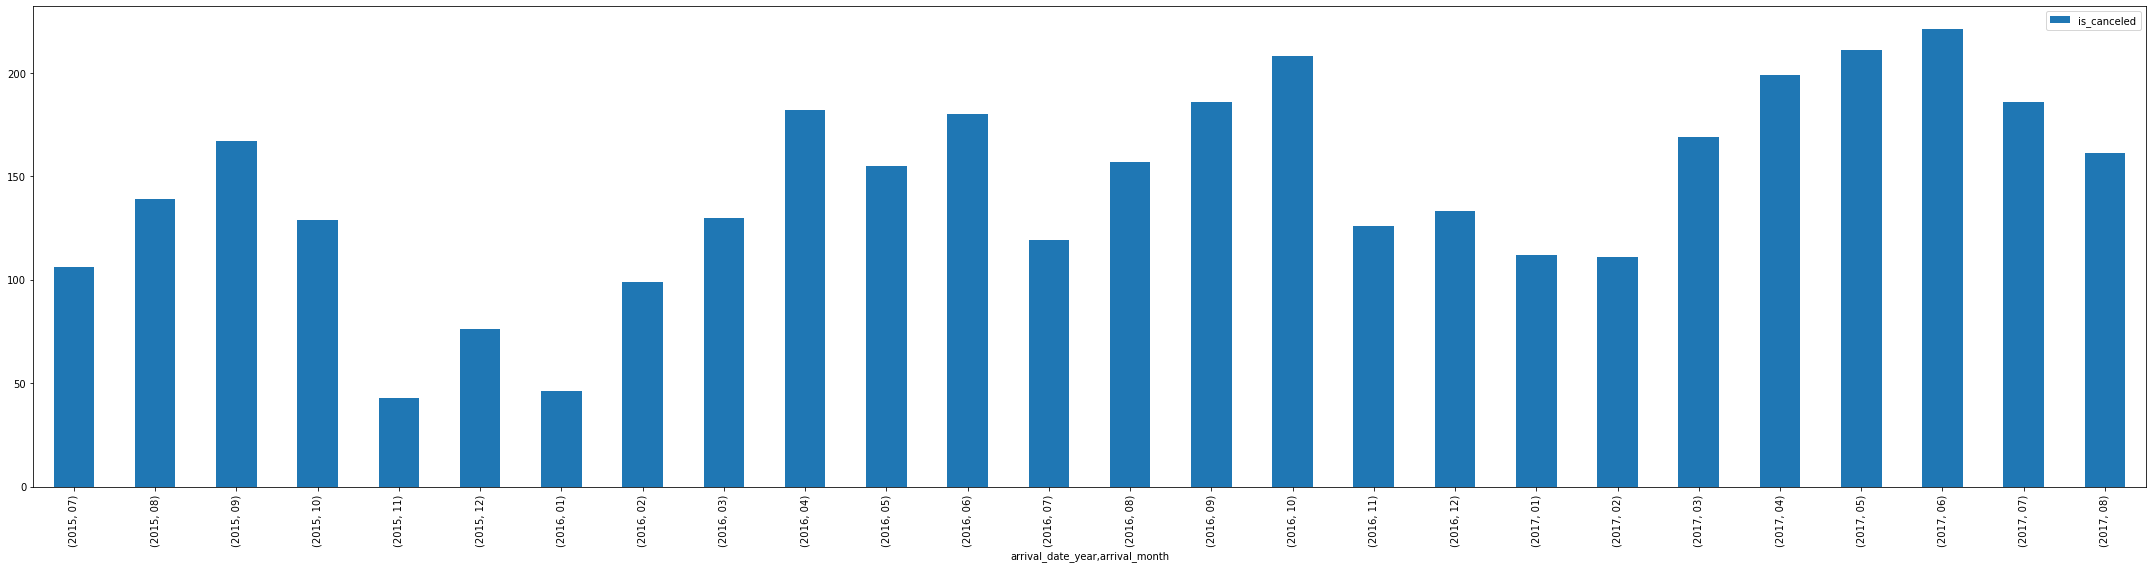

In [17]:
plt.figure(figsize=(500,10));
data_canceled_and_date.plot.bar(figsize=(30,8));
plt.tight_layout()

#### 3.2.3 Lead time 	

Se trata de el número de días que han pasado desde que se realizó la reserva hasta el momento en que empieza la reserva. Podemos observar que es una de las pocas variables cuantitativas continuas que posee nuestro dataset, lo que la convierte en una variable muy destacada a la hora de su tratamiento

In [18]:
data['lead_time'].describe()

count    10000.000000
mean       105.393800
std        108.267682
min          0.000000
25%         18.000000
50%         70.000000
75%        164.000000
max        629.000000
Name: lead_time, dtype: float64

Podemos observar que la distribución de la variable parece ajustarse a una distribucion exponencial, lo que convierte al logaritmo en su posible transformación natural. Esto será considerado en el apartado de tratamiento de variables cuantitativas

<AxesSubplot:>

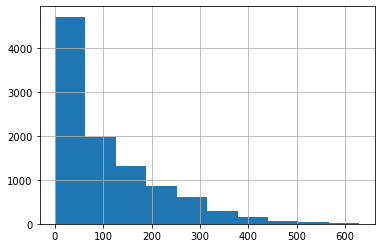

In [19]:
data['lead_time'].hist()

##### Evolución histórica
Vamos a mostrar como ha ido evolucionando la variable a lo largo de cada mes.

In [20]:
data_lead_time_and_date = data[['arrival_date_year', 'arrival_month', 'lead_time']].groupby(by=['arrival_date_year', 'arrival_month']).sum()
data_lead_time_and_date.head()

lead_time
arrival_date_year arrival_month           
2015              07                 30640
                  08                 32627
                  09                 50643
                  10                 42165
                  11                  7546

Del mismo modo que en el caso anterior, con la graficación de la variable frente al tiempo, podemos observar que la variable se encuentra fuertemente ligada a la estacionalidad.

<Figure size 36000x720 with 0 Axes>

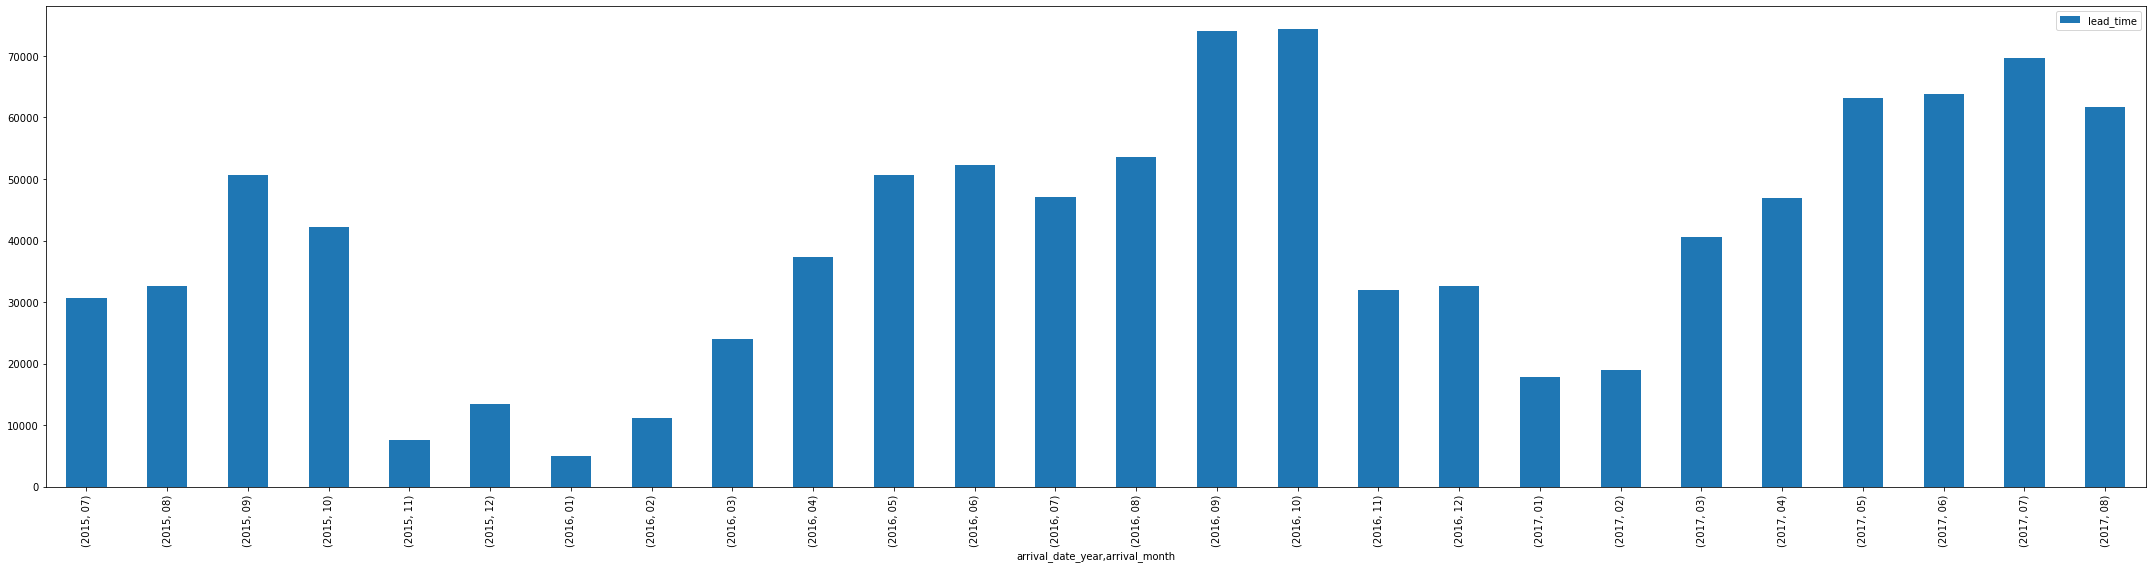

In [21]:
plt.figure(figsize=(500,10));
data_lead_time_and_date.plot.bar(figsize=(30,8));
plt.tight_layout()

#### 3.2.4 Arrival date year 	

Esta variable recoge el año de la llegada a la reserva. Esto nos permite realizar agrupaciones anuales de forma mucho más sencilla. Del mismo modo que con la variable a predecir, observamos que no se encuentra equitativamente distribuido nuestro sample, siendo mucho mas numerosos los registros del año 2016 y 2017

In [22]:
data['arrival_date_year'].value_counts()

2016    4743
2017    3463
2015    1794
Name: arrival_date_year, dtype: int64

Representamos el histograma para comprender las magnitudes de la desproporcionalidad de forma mas precisa

<AxesSubplot:>

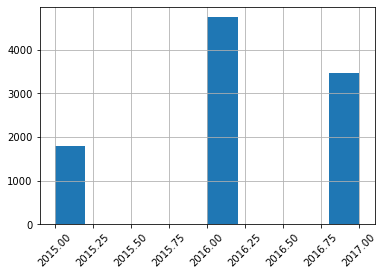

In [23]:
plt.xticks(rotation=45)
data['arrival_date_year'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del año y pintarlo en una gráfica.

In [24]:
data_prob_canceled_by_year = pd.crosstab(data['arrival_date_year'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_year

is_canceled,0,1
arrival_date_year,,
2015,0.632107,0.367893
2016,0.637149,0.362851
2017,0.604389,0.395611


<Figure size 36000x720 with 0 Axes>

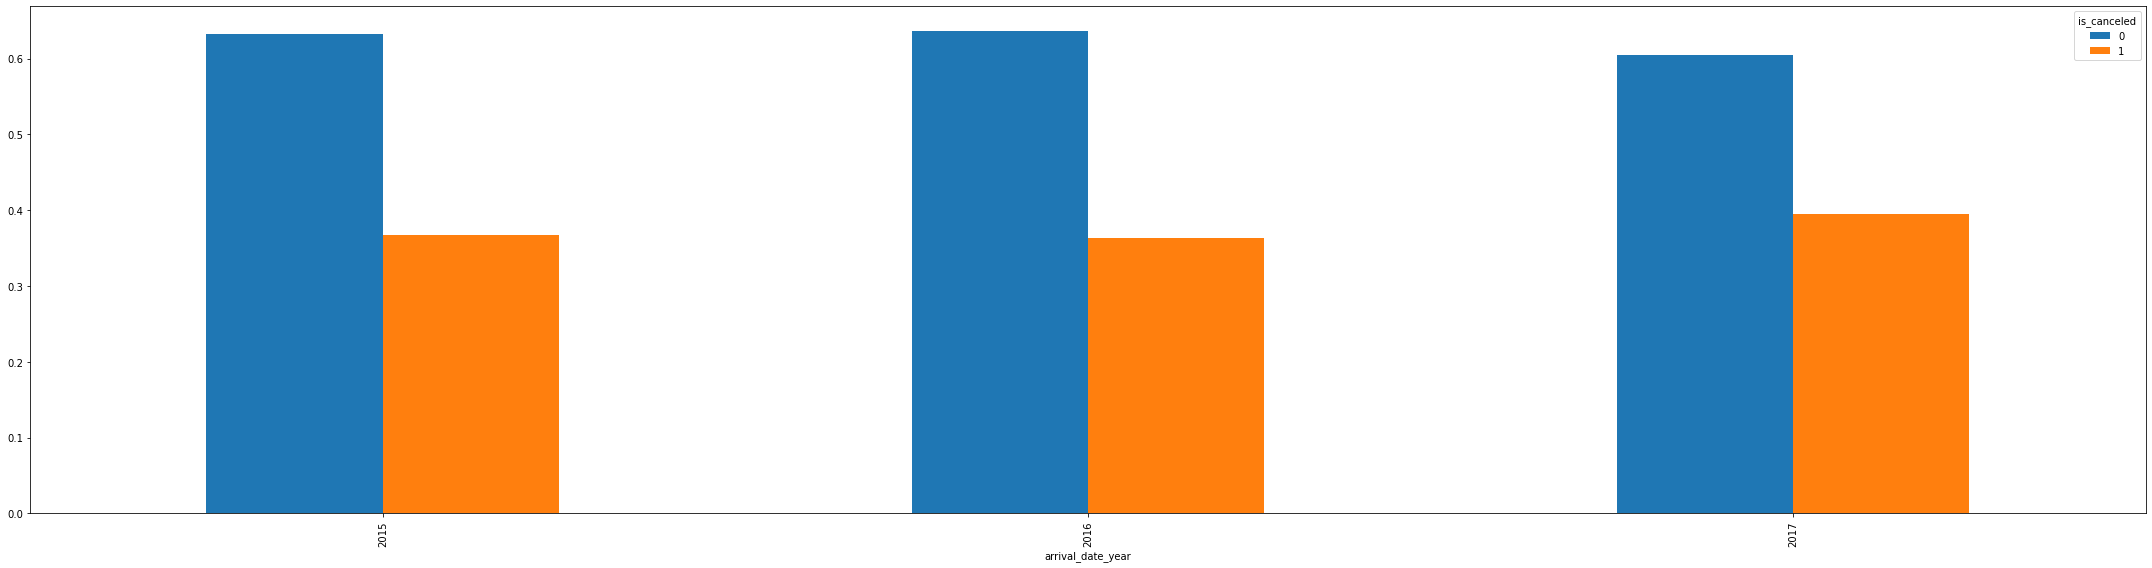

In [25]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_year.plot.bar(figsize=(30,8));
plt.tight_layout()

##### Comparación con is_canceled
Vamos a agrupar por año para ver como han ido cambiando las cancelaciones a lo largo de los años.

In [26]:
data_year_and_canceled = data[['arrival_date_year', 'is_canceled']]
data_year_and_canceled = data_year_and_canceled.groupby(by=['arrival_date_year']).sum()
data_year_and_canceled

,is_canceled
arrival_date_year,
2015,660
2016,1721
2017,1370


<Figure size 36000x720 with 0 Axes>

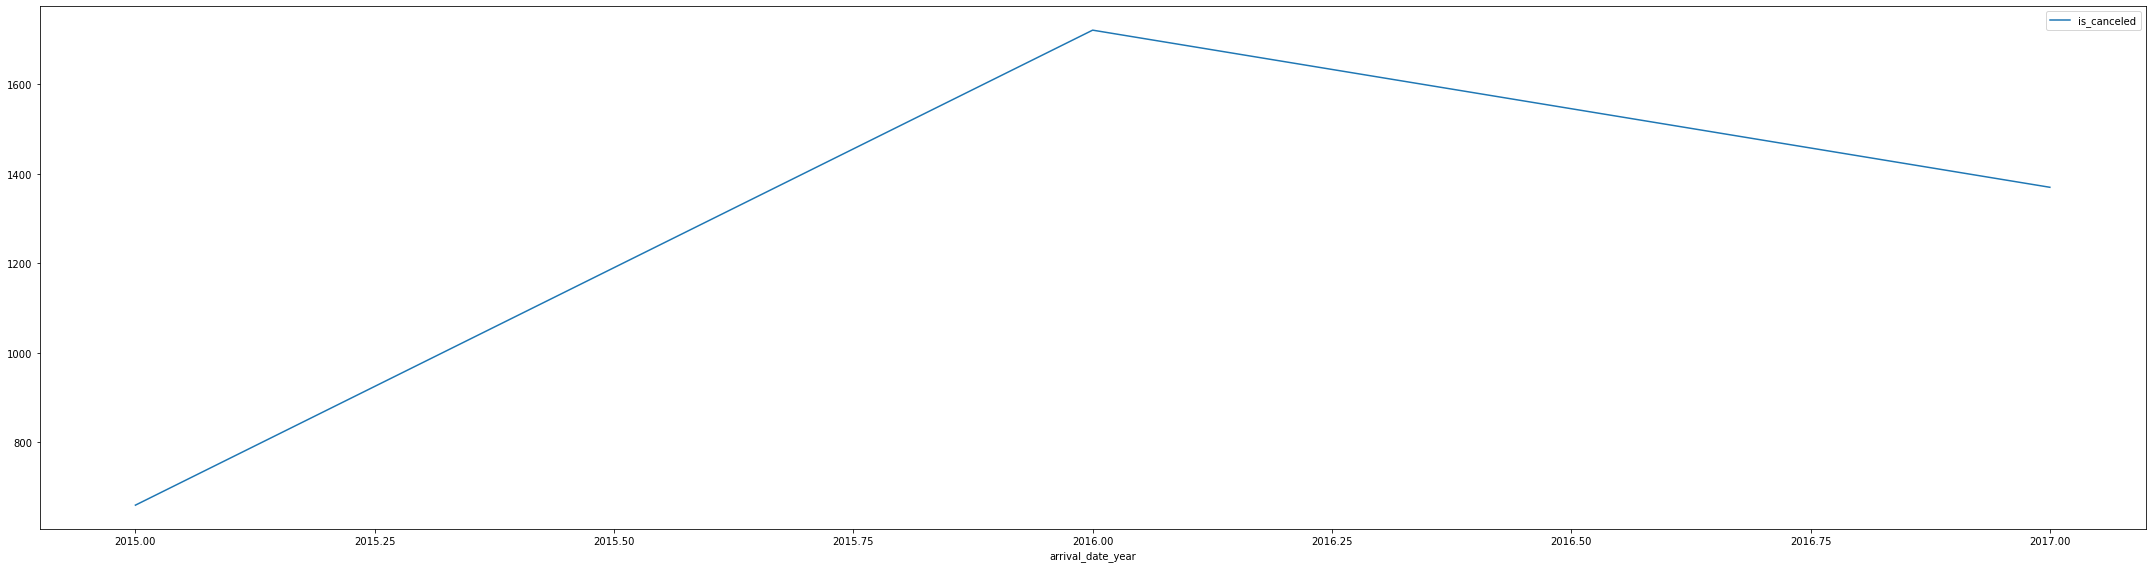

In [27]:
plt.figure(figsize=(500,10));
data_year_and_canceled.plot(figsize=(30,8));
plt.tight_layout()

#### 3.2.5 Arrival month 	
Usamos arrival_month(numérica), en lugar de arrival_date_month(categórica), pues son equivalentes.

In [28]:
data['arrival_month'].describe()

count     10000
unique       12
top          08
freq       1161
Name: arrival_month, dtype: object

<AxesSubplot:>

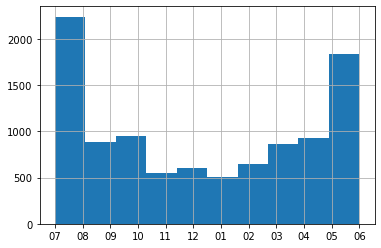

In [29]:
data['arrival_month'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del mes y pintarlo en una gráfica.

In [30]:
data_prob_canceled_by_month = pd.crosstab(data['arrival_month'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_month

is_canceled,0,1
arrival_month,,
01,0.686508,0.313492
02,0.673913,0.326087
03,0.652729,0.347271
04,0.588108,0.411892
05,0.613108,0.386892
06,0.550448,0.449552
07,0.619092,0.380908
08,0.606374,0.393626
09,0.601130,0.398870


Se puede observar que las cancelaciones tambien se encuentran ligadas a la temporalidad mensual. Además, como es lógico, las gráficas son simetricas y opuestas, sumando 1.

<Figure size 36000x720 with 0 Axes>

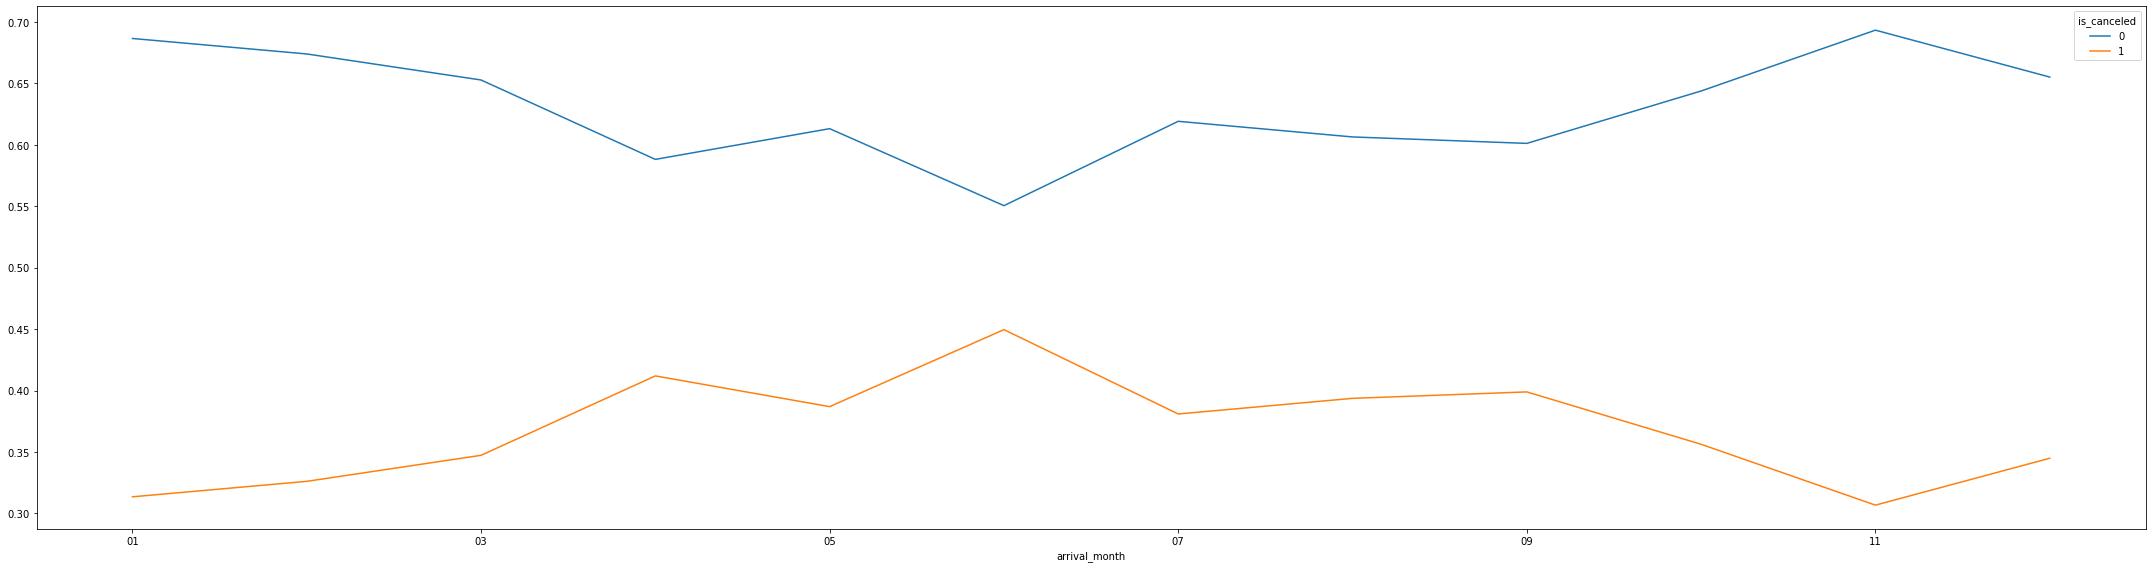

In [31]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_month.plot(figsize=(30,8));
plt.tight_layout()

#### Comparación con is_canceled
Vamos a agrupar por mes para ver como han ido cambiando las cancelaciones a lo largo de los meses.

In [32]:
data_month_and_canceled = data[['arrival_month', 'is_canceled']]
data_month_and_canceled = data_month_and_canceled.groupby(by=['arrival_month']).sum()
data_month_and_canceled

,is_canceled
arrival_month,
01,158
02,210
03,299
04,381
05,366
06,401
07,411
08,457
09,353


De nuevo podemos observar que el numero de cancelaciones en los meses de verano es mayor.

<Figure size 36000x720 with 0 Axes>

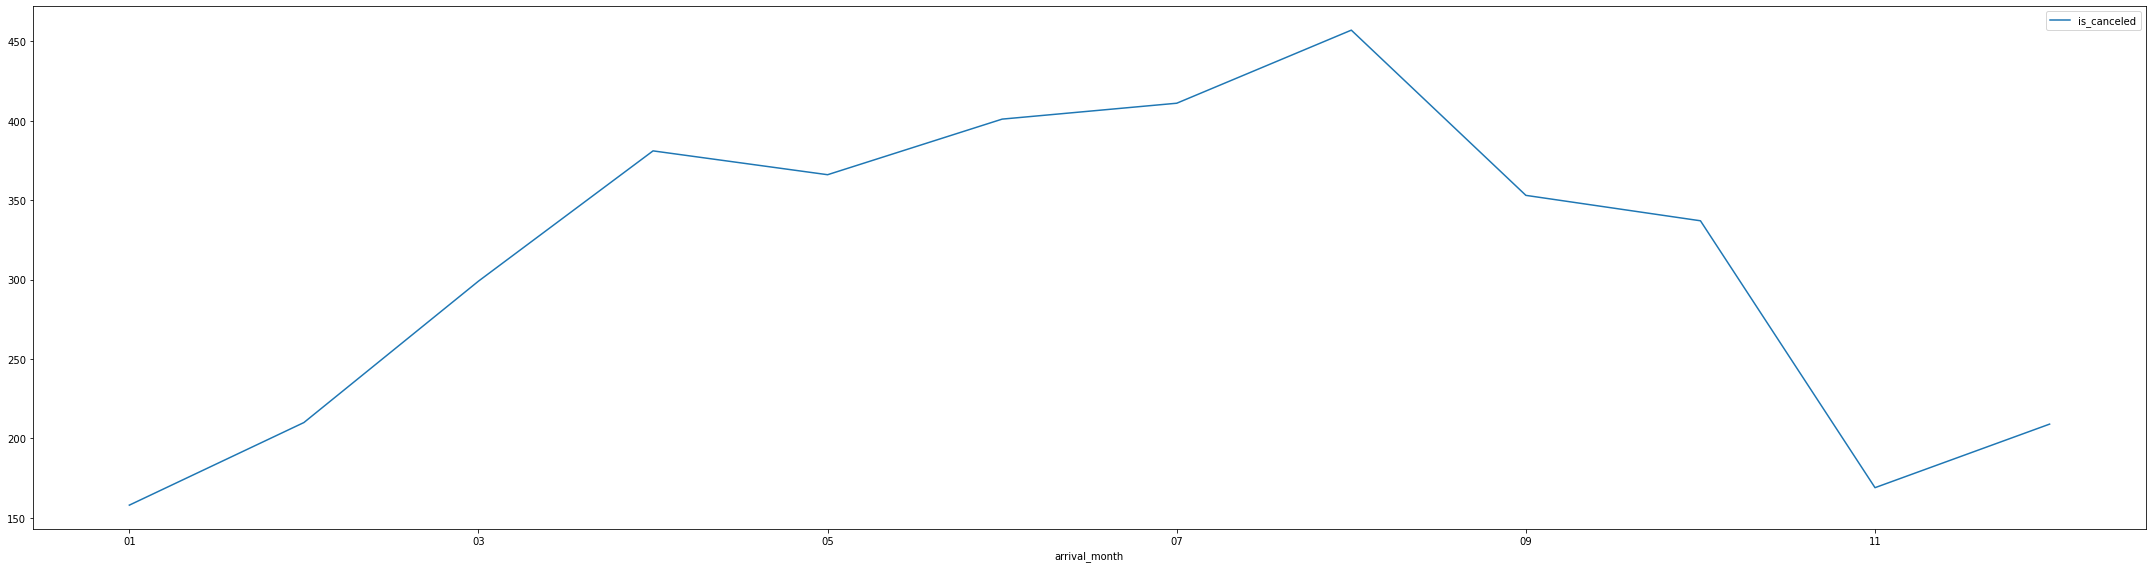

In [33]:
plt.figure(figsize=(500,10));
data_month_and_canceled.plot(figsize=(30,8));
plt.tight_layout()

#### 3.2.6 Arrival date week number 	

La variable Arrival date week number almacena la semana del año en la que se realizó la entrada al hotel, Es información intrinseca de otras columas (Concretamente las de Date)

In [34]:
data['arrival_date_week_number'].describe()

count    10000.000000
mean        27.267700
std         13.671588
min          1.000000
25%         16.000000
50%         28.000000
75%         38.000000
max         53.000000
Name: arrival_date_week_number, dtype: float64

<AxesSubplot:>

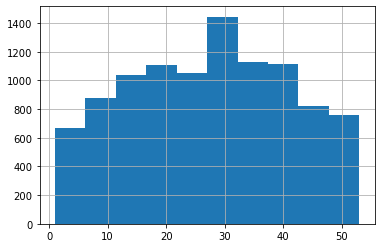

In [35]:
data['arrival_date_week_number'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función de la semana y pintarlo en una gráfica.

In [36]:
data_prob_canceled_by_weeknumber = pd.crosstab(data['arrival_date_week_number'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_weeknumber.head()

is_canceled,0,1
arrival_date_week_number,,
1,0.619048,0.380952
2,0.611650,0.388350
3,0.750000,0.250000
4,0.685484,0.314516
5,0.685950,0.314050


<Figure size 36000x720 with 0 Axes>

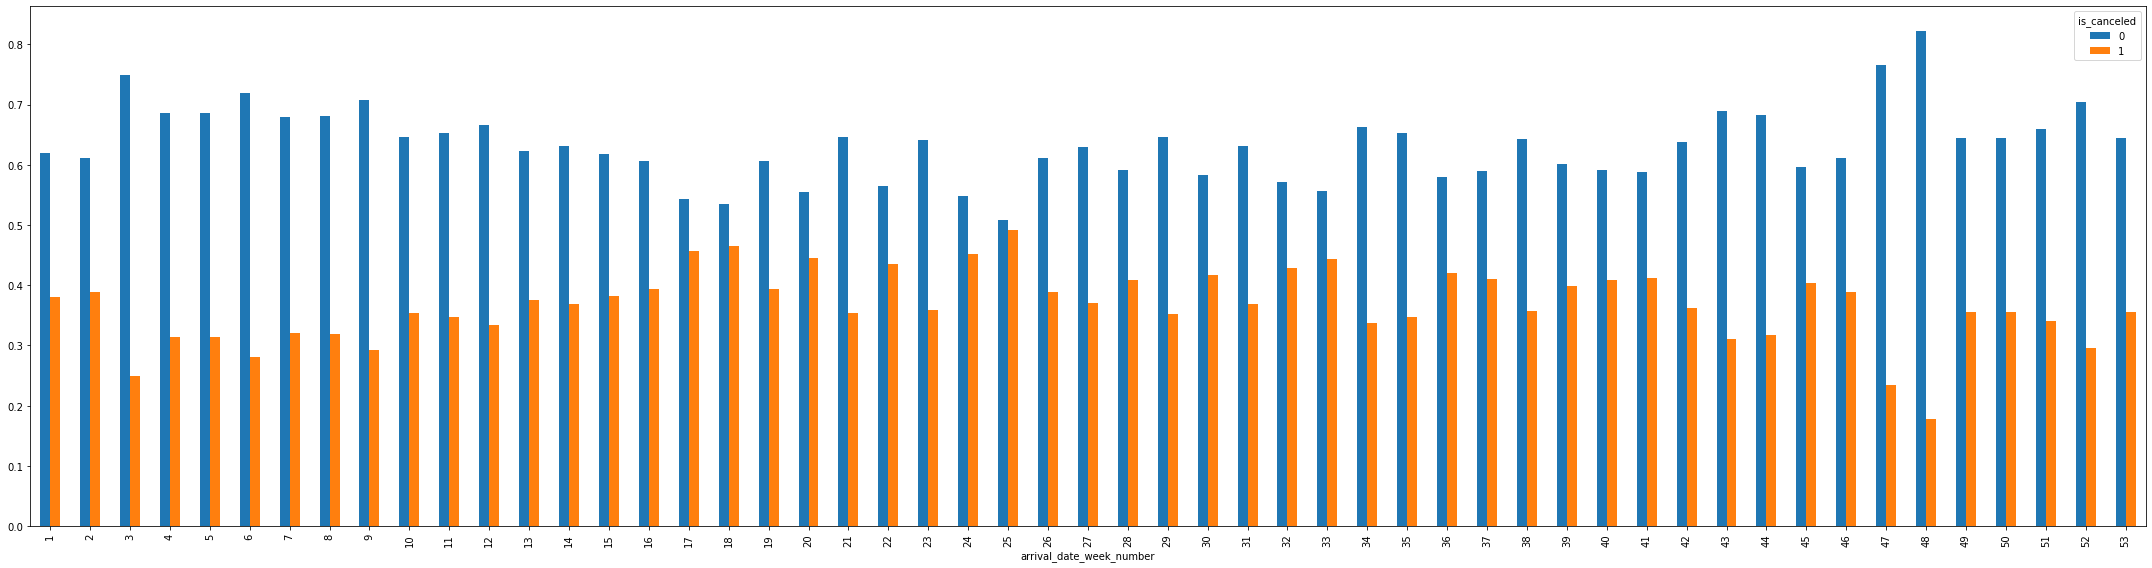

In [37]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_weeknumber.plot.bar(figsize=(30,8));
plt.tight_layout()

#### Comparación con is_canceled
Vamos a agrupar por el número de la semana para ver como han ido cambiando las cancelaciones a lo largo de las mismas.

In [38]:
data_week_and_canceled = data[['arrival_date_week_number', 'is_canceled']]
data_week_and_canceled = data_week_and_canceled.groupby(by=['arrival_date_week_number']).sum()
data_week_and_canceled.head()

,is_canceled
arrival_date_week_number,
1,32
2,40
3,29
4,39
5,38


<Figure size 36000x720 with 0 Axes>

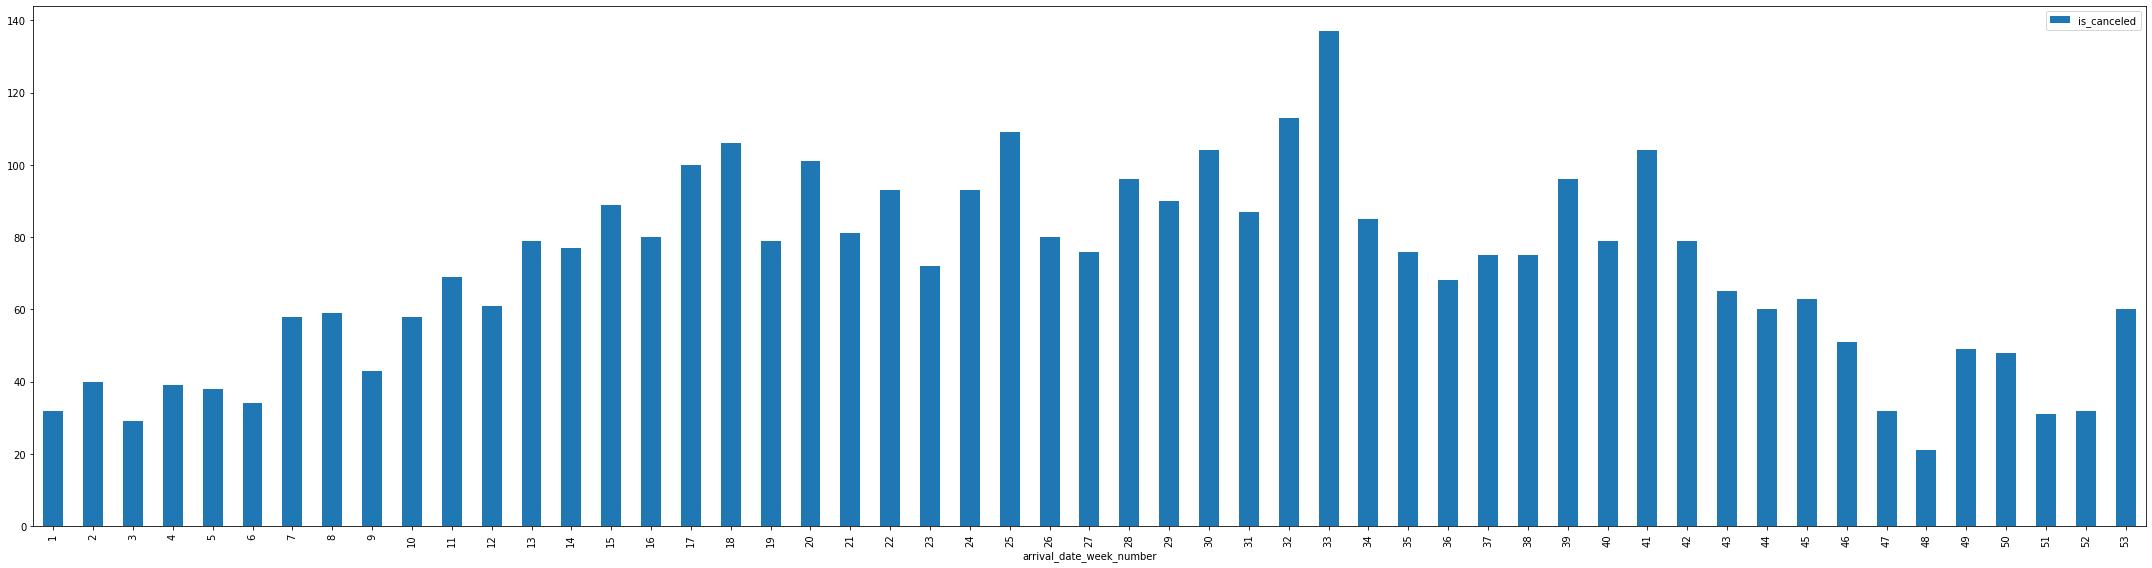

In [39]:
plt.figure(figsize=(500,10));
data_week_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()

#### 3.2.7 Arrival date day of month 	

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del día del mes y pintarlo en una gráfica.

In [40]:
data_prob_canceled_by_daynumber = pd.crosstab(data['arrival_date_day_of_month'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_daynumber.head()

is_canceled,0,1
arrival_date_day_of_month,,
1,0.564286,0.435714
2,0.658610,0.341390
3,0.603125,0.396875
4,0.637363,0.362637
5,0.623188,0.376812


<Figure size 36000x720 with 0 Axes>

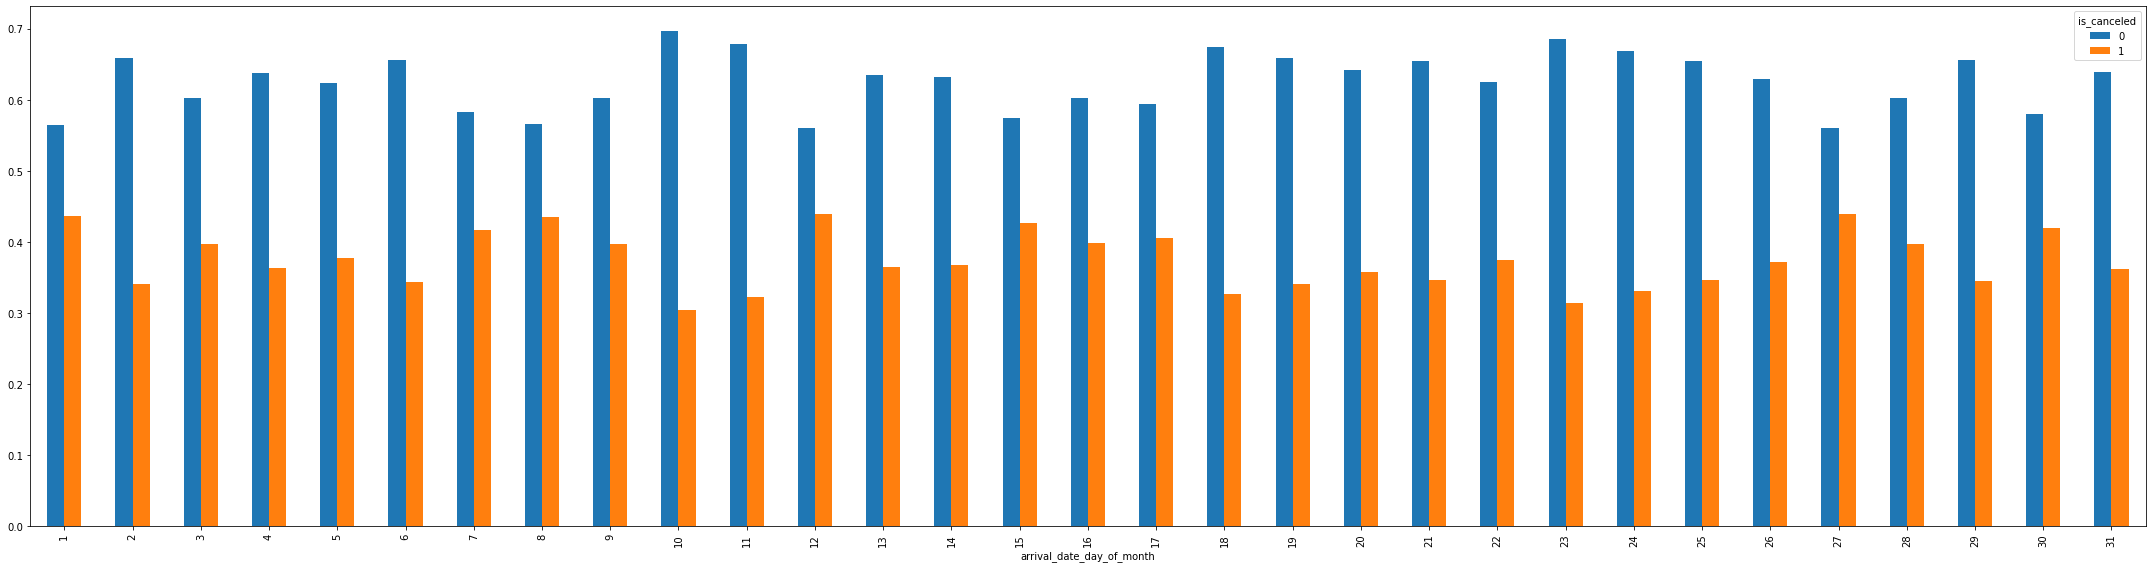

In [41]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_daynumber.plot.bar(figsize=(30,8));
plt.tight_layout()

##### Comparación con is_canceled
Vamos a agrupar por día del mes para ver como han ido cambiando las cancelaciones a lo largo de los mismos.

In [42]:
data_day_and_canceled = data[['arrival_date_day_of_month', 'is_canceled']]
data_day_and_canceled = data_day_and_canceled.groupby(by=['arrival_date_day_of_month']).sum()
data_day_and_canceled.head()

,is_canceled
arrival_date_day_of_month,
1,122
2,113
3,127
4,99
5,130


<Figure size 36000x720 with 0 Axes>

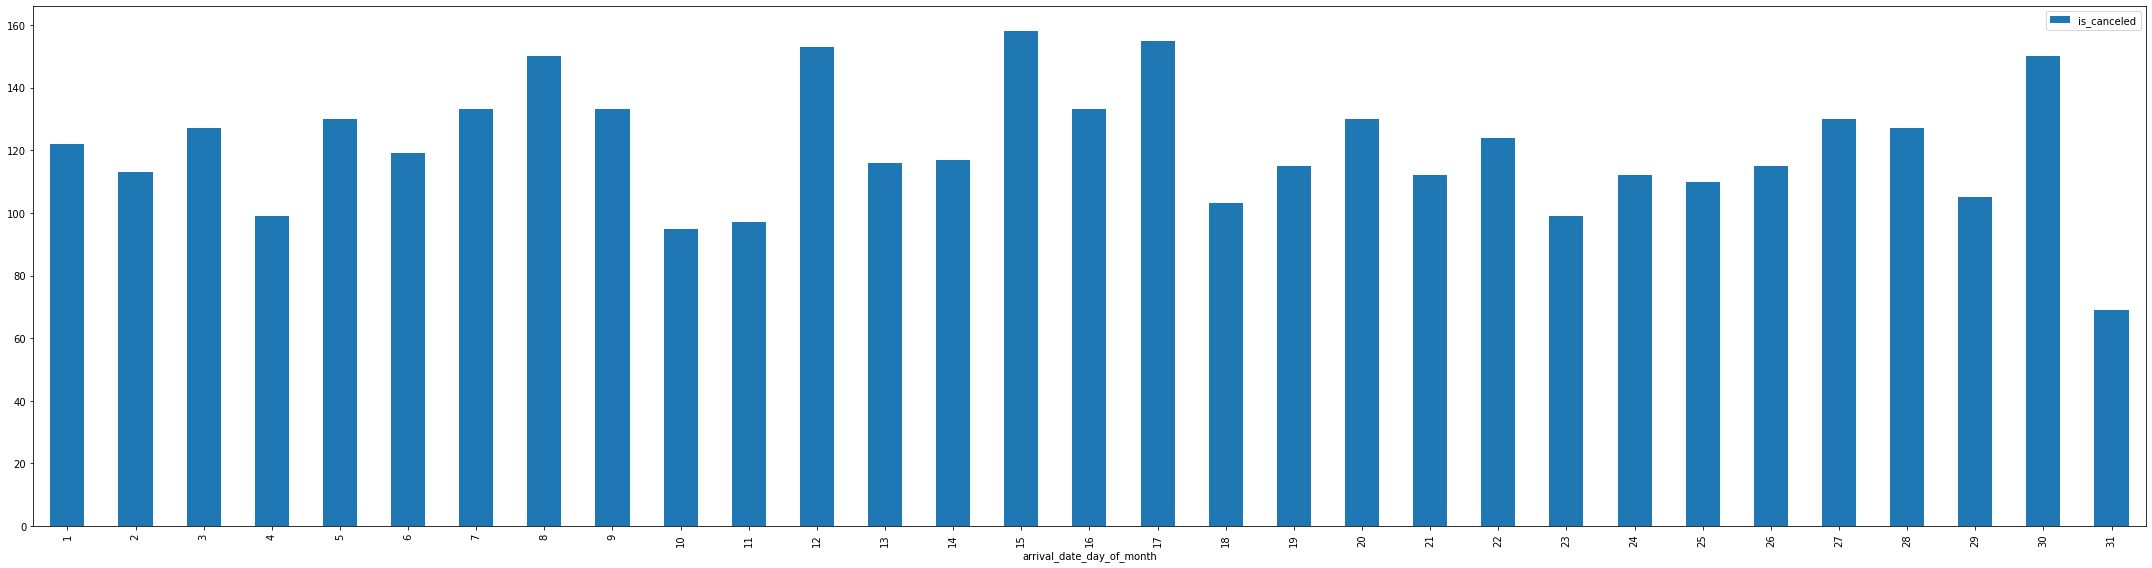

In [43]:
plt.figure(figsize=(500,10));
data_day_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()

#### 3.2.8 Stays in weekend nights 	
Noches de fin de semana reservadas.

In [44]:
data['stays_in_weekend_nights'].describe()

count    10000.000000
mean         0.927100
std          0.990396
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         10.000000
Name: stays_in_weekend_nights, dtype: float64

<AxesSubplot:>

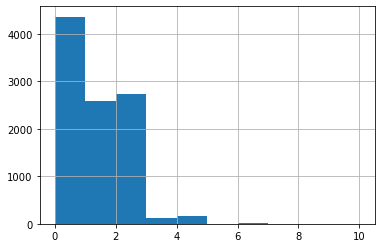

In [45]:
data['stays_in_weekend_nights'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del número de noches de fin de semana y pintarlo en una gráfica.

In [46]:
data_prob_canceled_by_weekend_nights = pd.crosstab(data['stays_in_weekend_nights'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_weekend_nights

is_canceled,0,1
stays_in_weekend_nights,,
0,0.622447,0.377553
1,0.626595,0.373405
2,0.623495,0.376505
3,0.623932,0.376068
4,0.713450,0.286550
5,0.000000,1.000000
6,0.588235,0.411765
7,0.000000,1.000000
8,0.500000,0.500000


Aquí se pueden ver algunos detalles significativos. Cuando se reservan 10 noches de fin de semana NADIE ha cancelado nunca la reserva. Y cuando se reservan 7 noches de fin de semana, TODO el mundo ha cancelado la reserva.

<Figure size 36000x720 with 0 Axes>

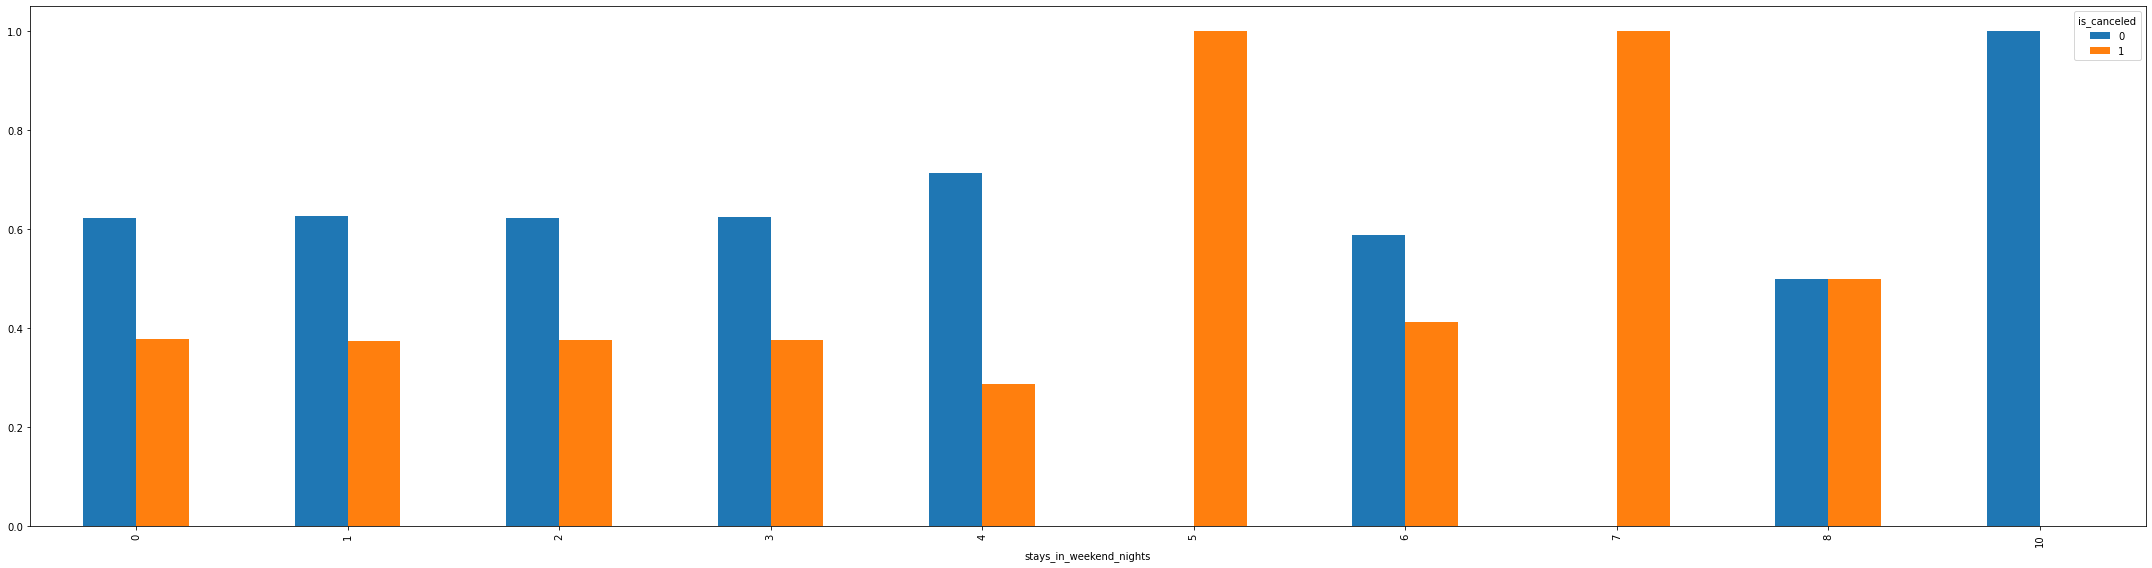

In [47]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_weekend_nights.plot.bar(figsize=(30,8));
plt.tight_layout()

##### Comparación con is_canceled
Vamos a agrupar por la variable para ver como han ido cambiando las cancelaciones en función de la misma.

In [48]:
data_weekend_nights_and_canceled = data[['stays_in_weekend_nights', 'is_canceled']]
data_weekend_nights_and_canceled = data_weekend_nights_and_canceled.groupby(by=['stays_in_weekend_nights']).sum()
data_weekend_nights_and_canceled

,is_canceled
stays_in_weekend_nights,
0,1645
1,966
2,1032
3,44
4,49
5,5
6,7
7,2
8,1


Al ver estos resultado se aprecia que la probabilidad de antes es engañosa, ya que se debe a muestras muy pequeñas o incluso vacías.

<Figure size 36000x720 with 0 Axes>

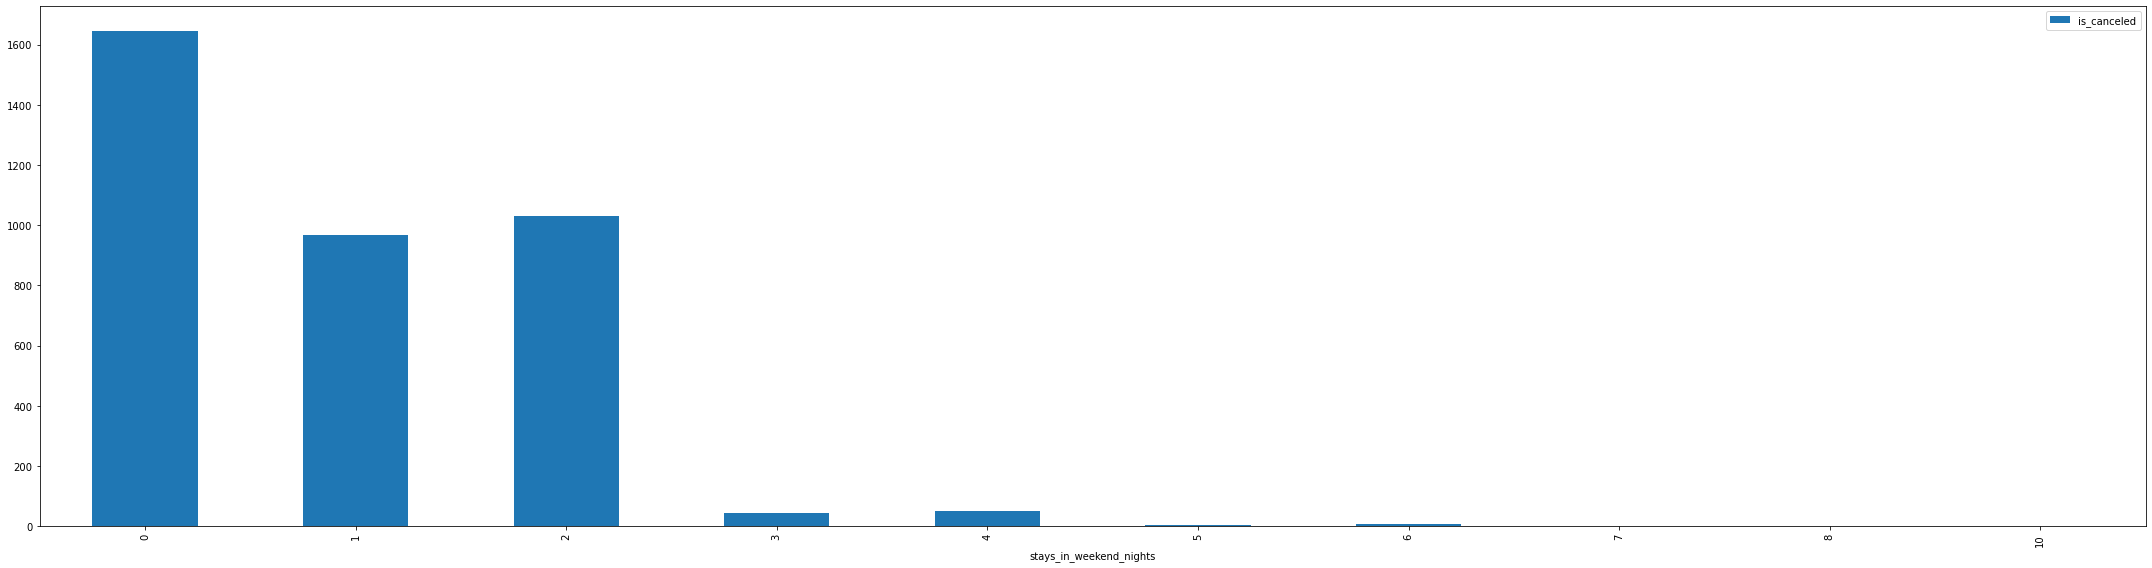

In [49]:
plt.figure(figsize=(500,10));
data_weekend_nights_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()

#### 3.2.9 Stays in week nights 	
Noches entre semana reservadas.

In [50]:
data['stays_in_week_nights'].describe()

count    10000.000000
mean         2.516500
std          1.882892
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         25.000000
Name: stays_in_week_nights, dtype: float64

<AxesSubplot:>

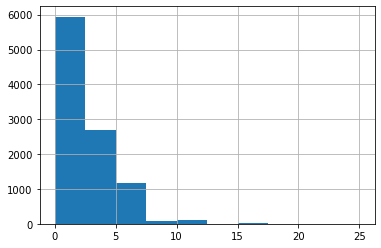

In [51]:
data['stays_in_week_nights'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del número de noches entre semana y pintarlo en una gráfica.

In [52]:
data_prob_canceled_by_week_nights = pd.crosstab(data['stays_in_week_nights'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_week_nights.head()

is_canceled,0,1
stays_in_week_nights,,
0,0.731942,0.268058
1,0.678247,0.321753
2,0.548654,0.451346
3,0.605885,0.394115
4,0.628971,0.371029


<Figure size 36000x720 with 0 Axes>

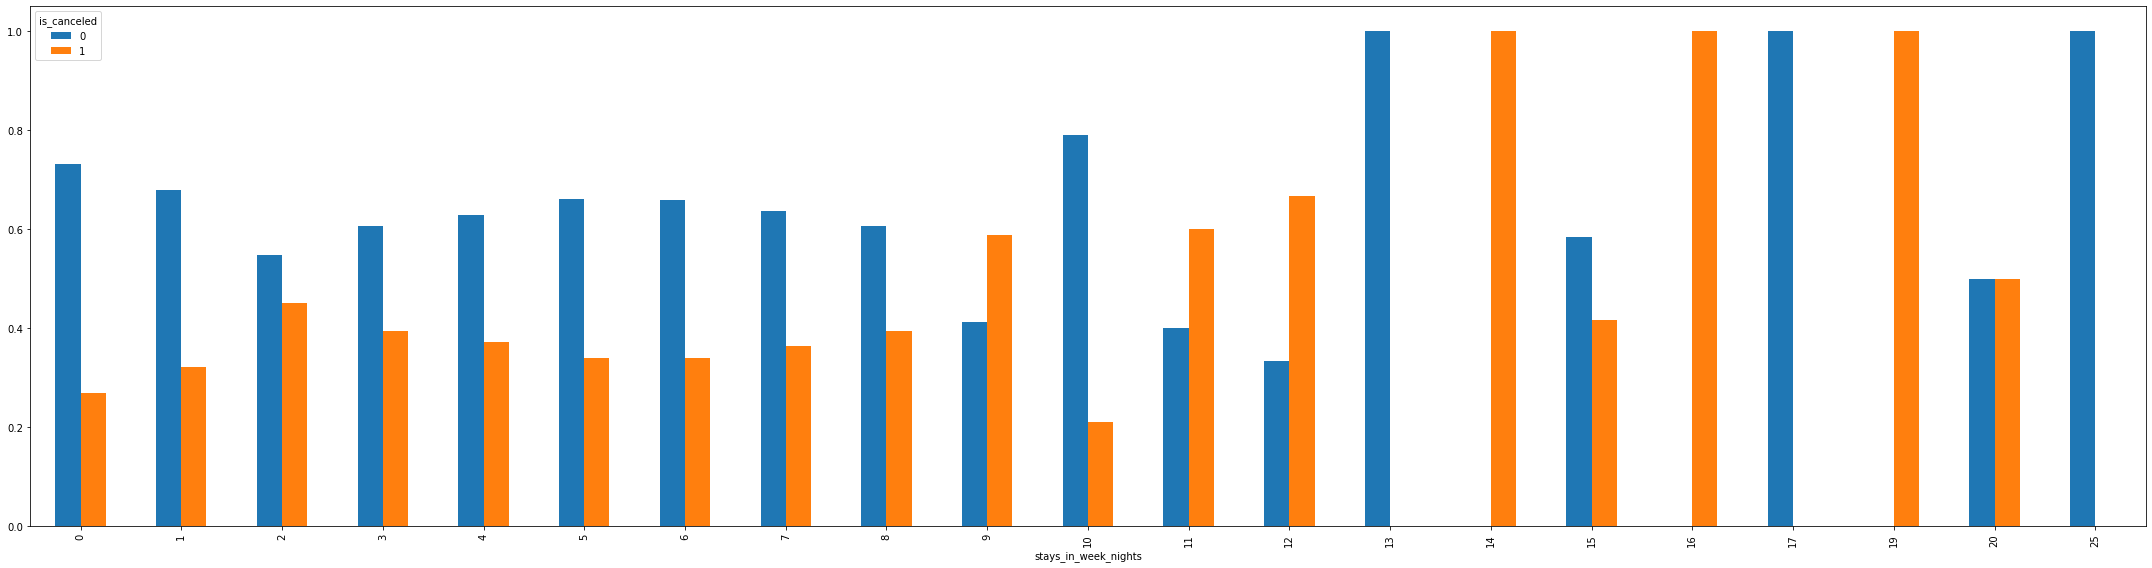

In [53]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_week_nights.plot.bar(figsize=(30,8));
plt.tight_layout()

##### Comparación con is_canceled
Vamos a agrupar por la variable para ver como han ido cambiando las cancelaciones a lo largo de la misma.

In [54]:
data_week_nights_and_canceled = data[['stays_in_week_nights', 'is_canceled']]
data_week_nights_and_canceled = data_week_nights_and_canceled.groupby(by=['stays_in_week_nights']).sum()
data_week_nights_and_canceled.head()

,is_canceled
stays_in_week_nights,
0,167
1,815
2,1257
3,750
4,292


<Figure size 36000x720 with 0 Axes>

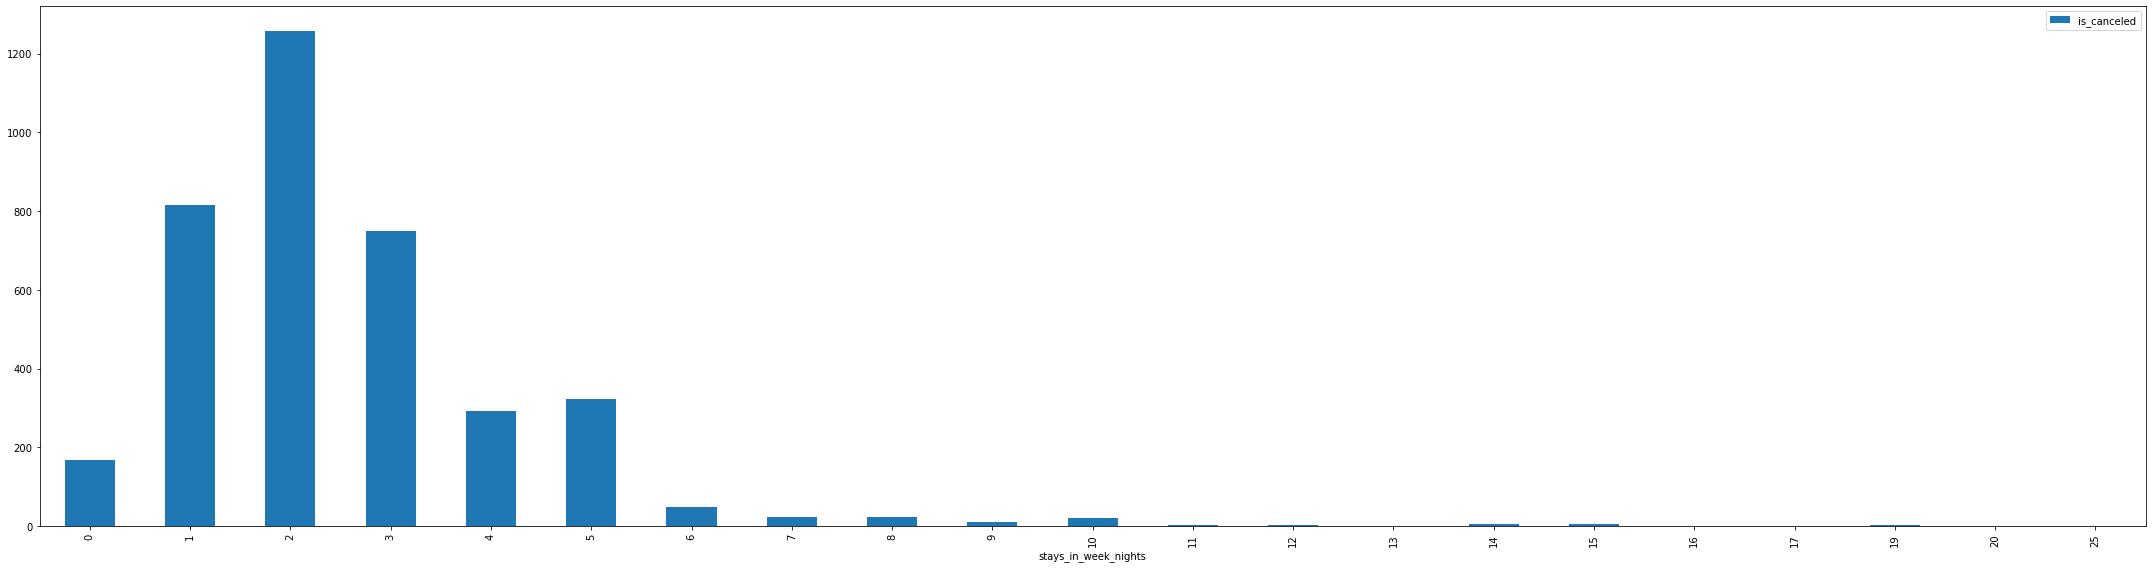

In [55]:
plt.figure(figsize=(500,10));
data_week_nights_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()

#### 3.2.10 Adults 	

La variable adulst almacena el numero de adultos para el cual se realizó la reserva. Es una variable discreta, y que puede ser de importancia en proximas etapas, ya que podria estar relacionada con las cancelaciones, pues podria parecer más dificil realizar una cancelación de una reserva de un mayor número de asistentes.

In [56]:
data['adults'].describe()

count    10000.000000
mean         1.869600
std          0.572912
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         27.000000
Name: adults, dtype: float64

En el gráfico sigueinte s epuede observar que la amplia mayoría de las reservas se encuentran adjudicadas a dos adultos, siendo el segundo valor mas repetido el 1 y residuales otros valores como pudiera ser el 20 o el 27

<AxesSubplot:xlabel='adults'>

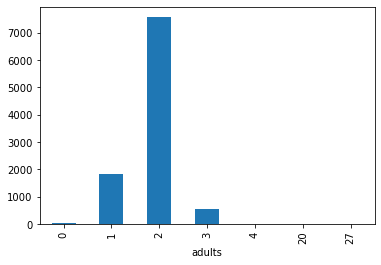

In [57]:
data.groupby('adults')['babies'].count().plot(kind='bar')

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del número de adultos y pintarlo en una gráfica.

In [58]:
data_prob_canceled_by_adults = pd.crosstab(data['adults'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_adults

is_canceled,0,1
adults,,
0,0.692308,0.307692
1,0.713666,0.286334
2,0.603007,0.396993
3,0.626151,0.373849
4,1.000000,0.000000
20,0.000000,1.000000
27,0.000000,1.000000


<Figure size 36000x720 with 0 Axes>

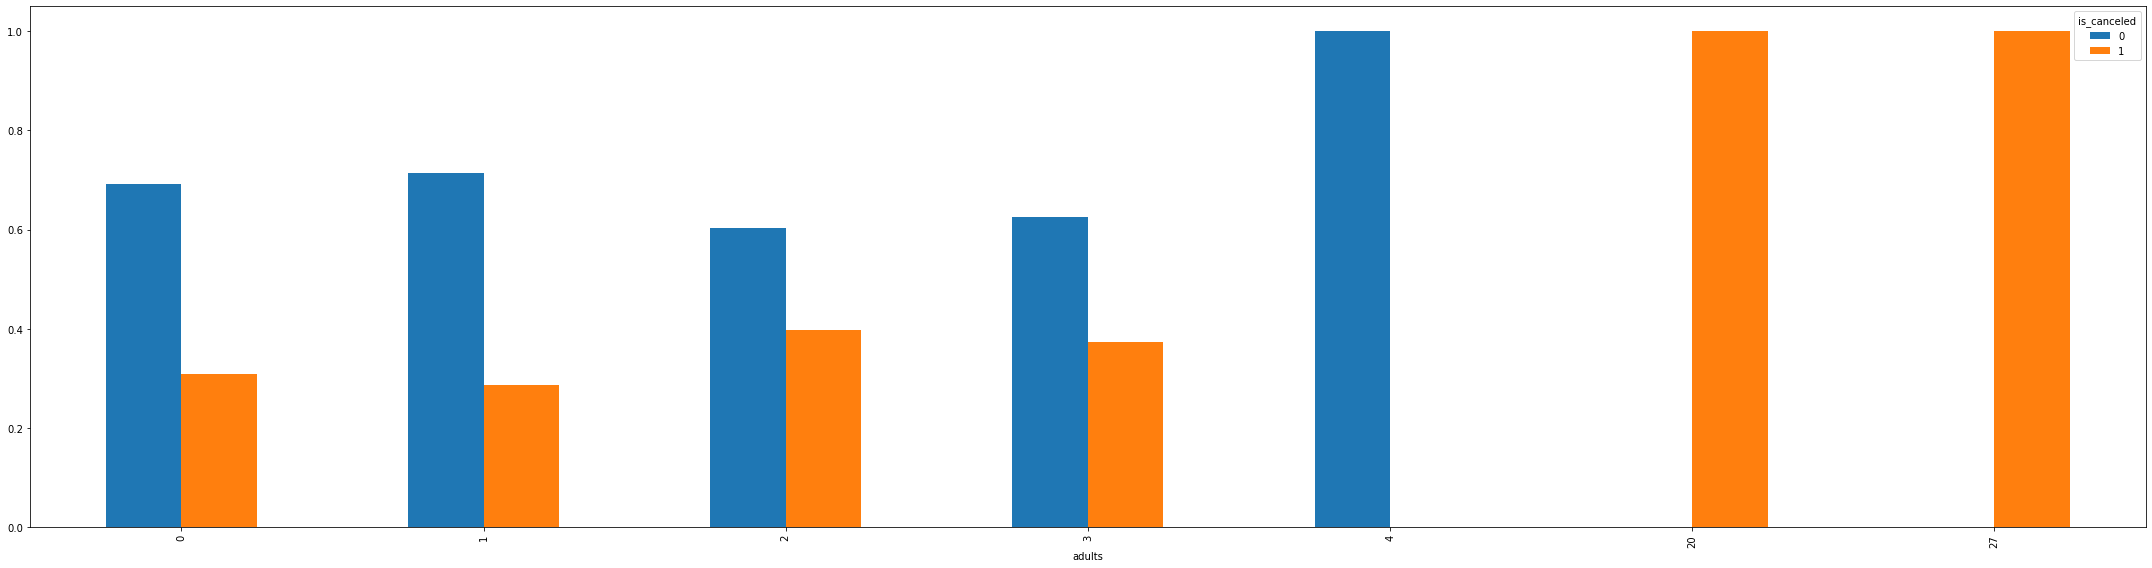

In [59]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_adults.plot.bar(figsize=(30,8));
plt.tight_layout()

#### Comparación con is_canceled
Vamos a agrupar por el número de adultos para ver como han ido cambiando las cancelaciones en función de los mismos.

In [60]:
data_adults_and_canceled = data[['adults', 'is_canceled']]
data_adults_and_canceled = data_adults_and_canceled.groupby(by=['adults']).sum()
data_adults_and_canceled

,is_canceled
adults,
0,8
1,528
2,3010
3,203
4,0
20,1
27,1


<Figure size 36000x720 with 0 Axes>

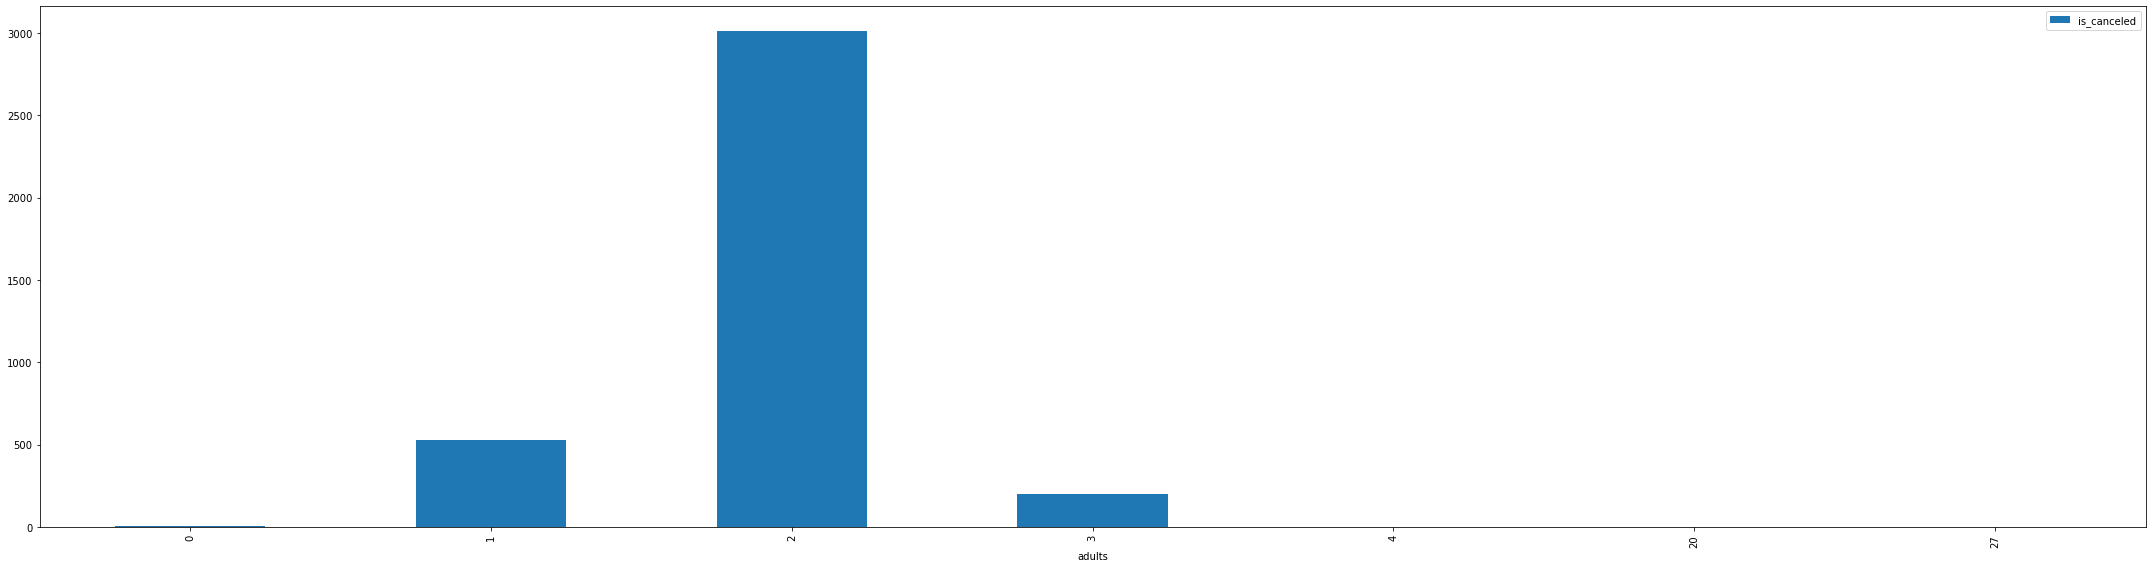

In [61]:
plt.figure(figsize=(500,10));
data_adults_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()

#### 3.2.11 Children 	

In [62]:
data['children'].describe()

count    10000.000000
mean         0.108000
std          0.405157
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: children, dtype: float64

<AxesSubplot:>

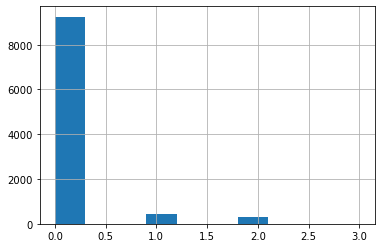

In [63]:
data['children'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del número de niños y pintarlo en una gráfica.

In [64]:
data_prob_canceled_by_children = pd.crosstab(data['children'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_children

is_canceled,0,1
children,,
0.0,0.625554,0.374446
1.0,0.661972,0.338028
2.0,0.552381,0.447619
3.0,0.750000,0.250000


<Figure size 36000x720 with 0 Axes>

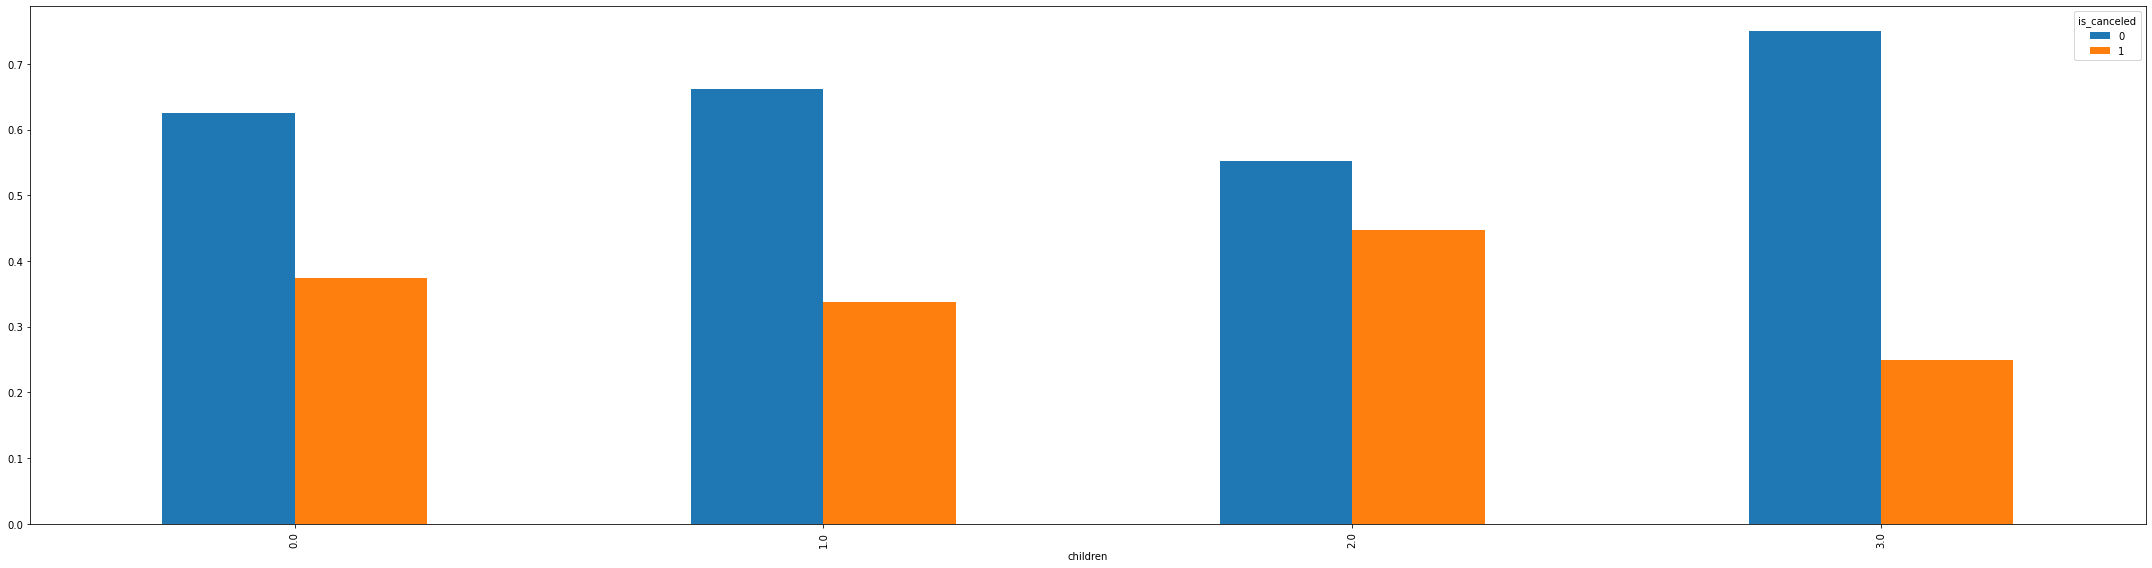

In [65]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_children.plot.bar(figsize=(30,8));
plt.tight_layout()

#### Comparación con is_canceled
Vamos a agrupar por el número de niños para ver como han ido cambiando las cancelaciones en función de los mismos.

In [66]:
data_children_and_canceled = data[['children', 'is_canceled']]
data_children_and_canceled = data_children_and_canceled.groupby(by=['children']).sum()
data_children_and_canceled

,is_canceled
children,
0.0,3464
1.0,144
2.0,141
3.0,2


<Figure size 36000x720 with 0 Axes>

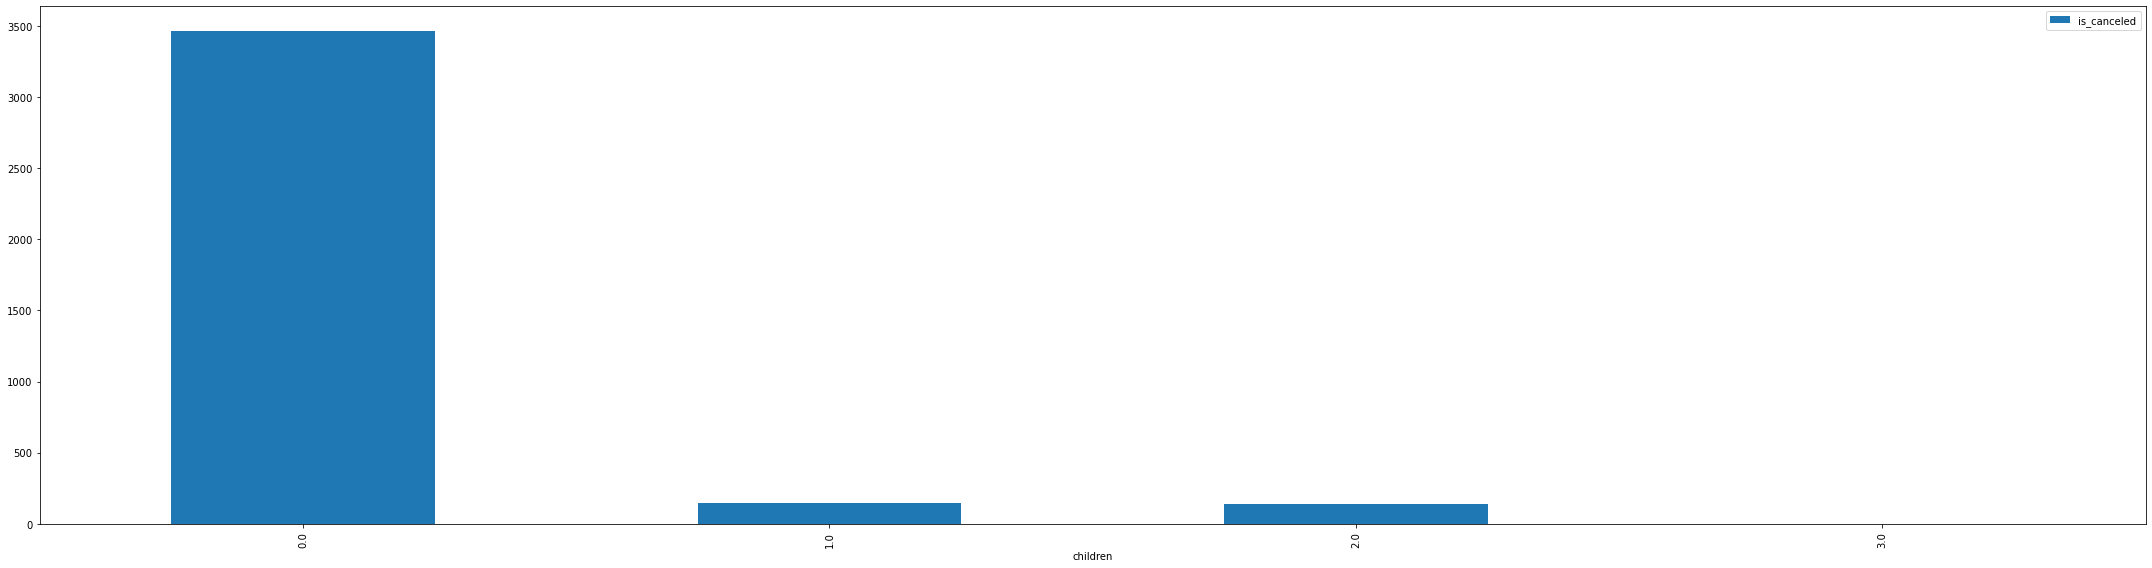

In [67]:
plt.figure(figsize=(500,10));
data_children_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()

#### 3.2.12 Babies

In [68]:
data['babies'].describe()

count    10000.000000
mean         0.008500
std          0.093961
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: babies, dtype: float64

<AxesSubplot:>

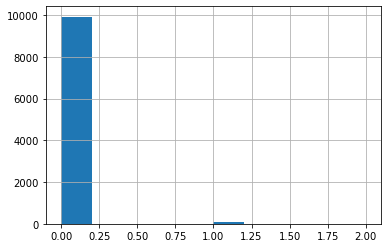

In [69]:
data['babies'].hist()

##### Tabla de contingencias
Sacamos una tabla de contingencias para ver con que probabilidad se cancela o no en función del nñumero de bebés y pintarlo en una gráfica.

In [70]:
data_prob_canceled_by_babies = pd.crosstab(data['babies'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_babies

is_canceled,0,1
babies,,
0,0.623576,0.376424
1,0.777778,0.222222
2,1.000000,0.000000


<Figure size 36000x720 with 0 Axes>

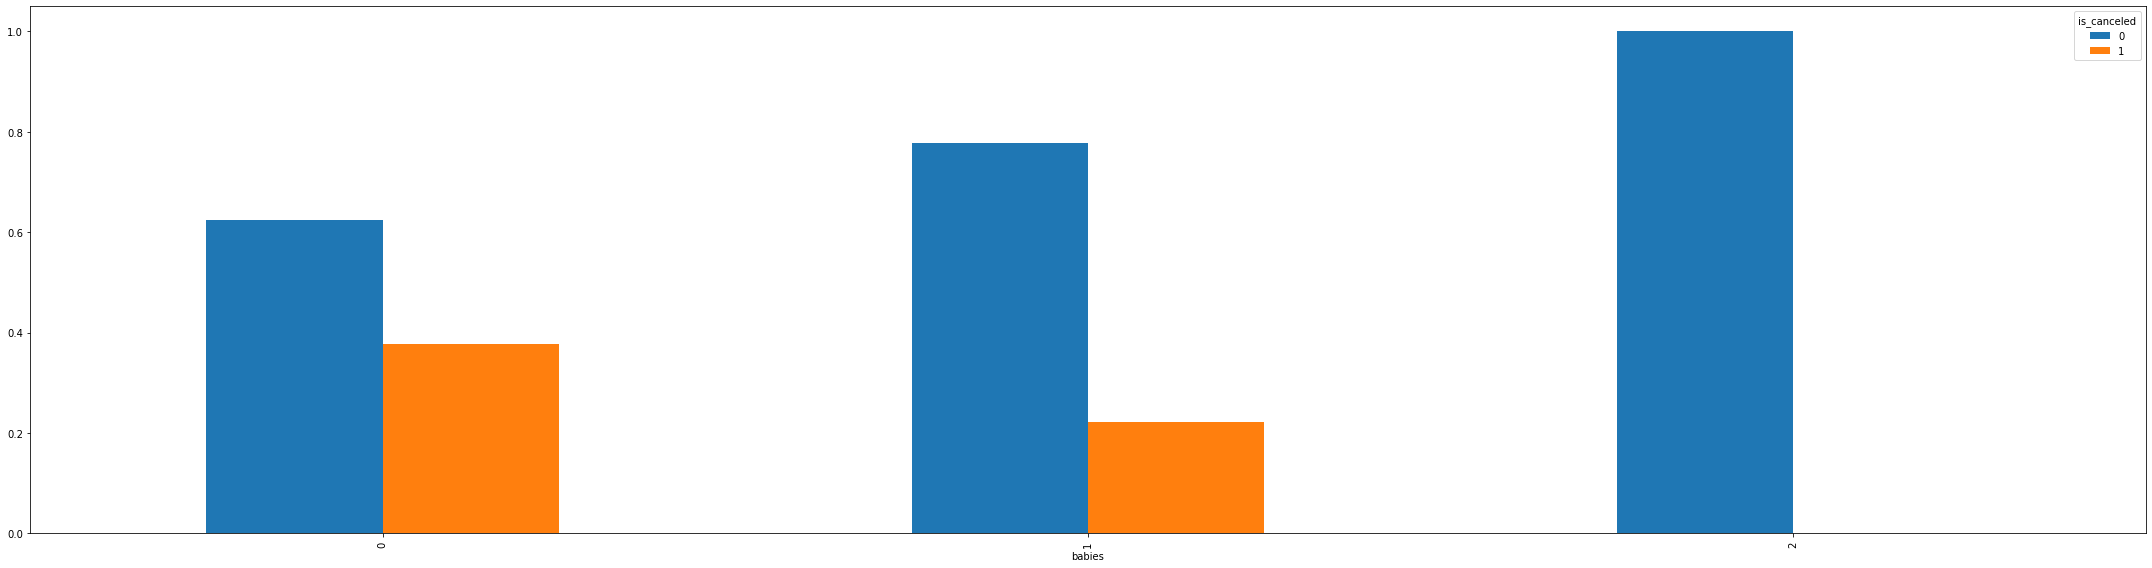

In [71]:
plt.figure(figsize=(500,10));
data_prob_canceled_by_babies.plot.bar(figsize=(30,8));
plt.tight_layout()

#### Comparación con is_canceled
Vamos a agrupar por el número de bebés para ver como han ido cambiando las cancelaciones en función de los mismos.

In [72]:
data_babies_and_canceled = data[['babies', 'is_canceled']]
data_babies_and_canceled = data_babies_and_canceled.groupby(by=['babies']).sum()
data_babies_and_canceled

,is_canceled
babies,
0,3733
1,18
2,0


<Figure size 36000x720 with 0 Axes>

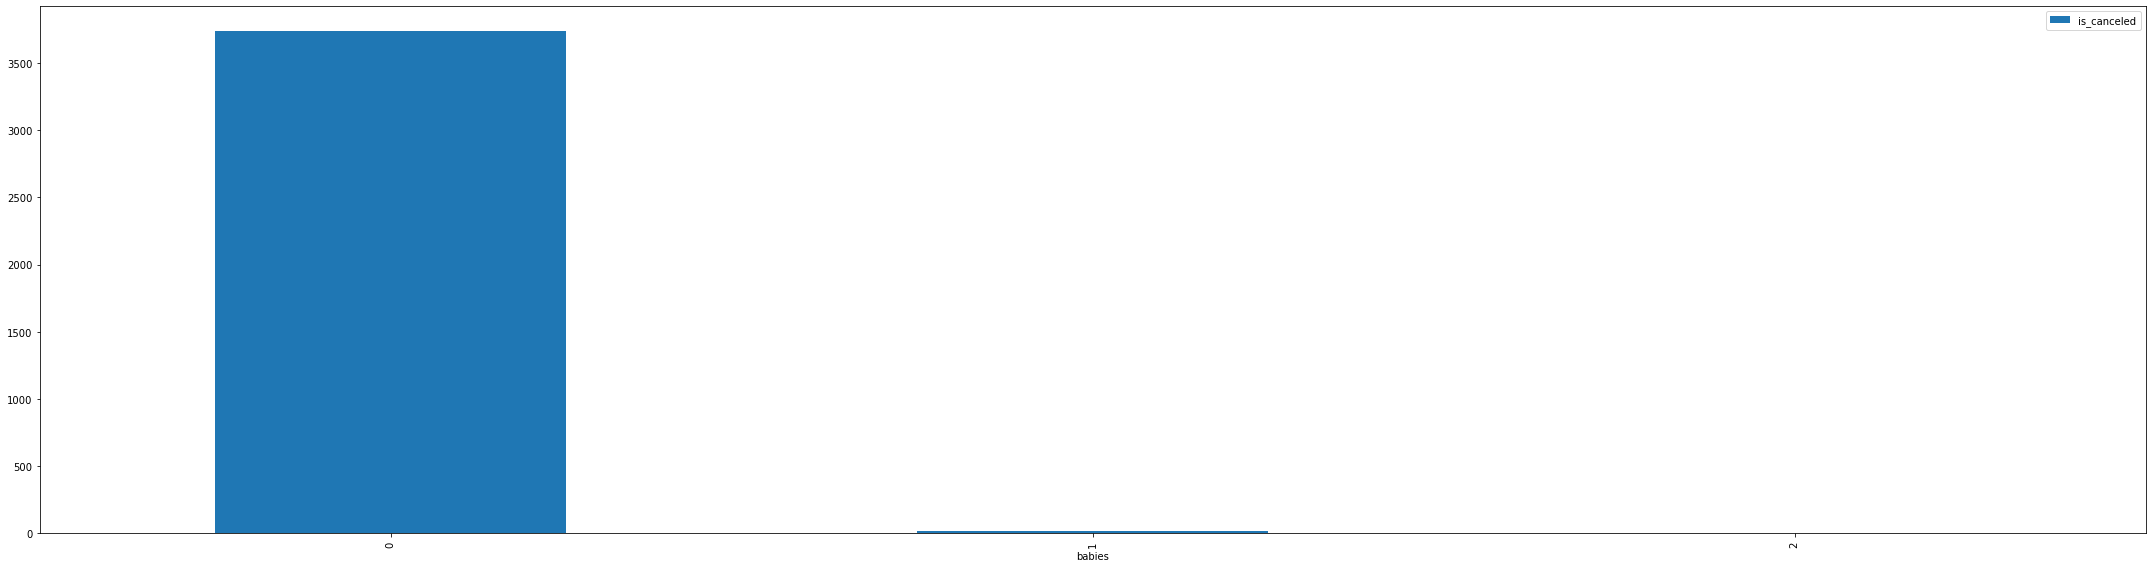

In [73]:
plt.figure(figsize=(500,10));
data_babies_and_canceled.plot.bar(figsize=(30,8));
plt.tight_layout()

#### 3.2.13 Meal
Tipo de comida reservada.

Como podemos observar la variable info es una variable categorica con 5 valores distintos, que representan lo siguiente:

* BB: Bed & Breakfast

* HB: Half Board (Breakfast and Dinner normally)

* FB: Full Board (Beakfast, Lunch and Dinner)

* SC: Self Catering

* Undefined

Podemos observar que hay valores faltyas, para una posibnle posterior imputación

In [74]:
data.meal.describe()

count     10000
unique        5
top          BB
freq       7726
Name: meal, dtype: object

In [75]:
data.meal.value_counts()

BB           7726
HB           1215
SC            873
Undefined     105
FB             81
Name: meal, dtype: int64

<AxesSubplot:>

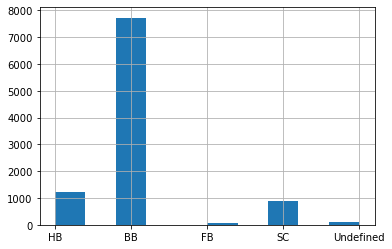

In [76]:
data.meal.hist()

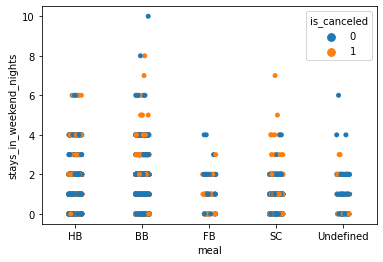

In [77]:
ax = sns.stripplot(y="stays_in_weekend_nights", x="meal",hue="is_canceled", data=data)

#### 3.2.14 Country

La variable country representa el país de la reserva, de modo que constituye una variable categórica con 108 valores diferentes. El país mas representado es Portugal.

In [78]:
data.country.describe()

count     9950
unique     108
top        PRT
freq      4025
Name: country, dtype: object

In [79]:
data.country.value_counts().head()

PRT    4025
GBR    1019
FRA     861
ESP     740
DEU     604
Name: country, dtype: int64

Vemos que el país del cual más información poseemos es portugal, seguido de Reino Unido y Francia. Analizaremos el número de cancelaciones por país de los 5 más abundantes

In [80]:
data_topcountrys= data[data.country=='PRT']
data_topcountrys= data_topcountrys.append(data[data.country=='GBR'])
data_topcountrys= data_topcountrys.append(data[data.country=='FRA'])
data_topcountrys= data_topcountrys.append(data[data.country=='ESP'])
data_topcountrys= data_topcountrys.append(data[data.country=='DEU'])
data_prob_canceled_by_country = pd.crosstab(data_topcountrys['country'], data_topcountrys['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_country

is_canceled,0,1
country,,
DEU,0.817881,0.182119
ESP,0.725676,0.274324
FRA,0.815331,0.184669
GBR,0.803729,0.196271
PRT,0.425093,0.574907


<AxesSubplot:xlabel='country'>

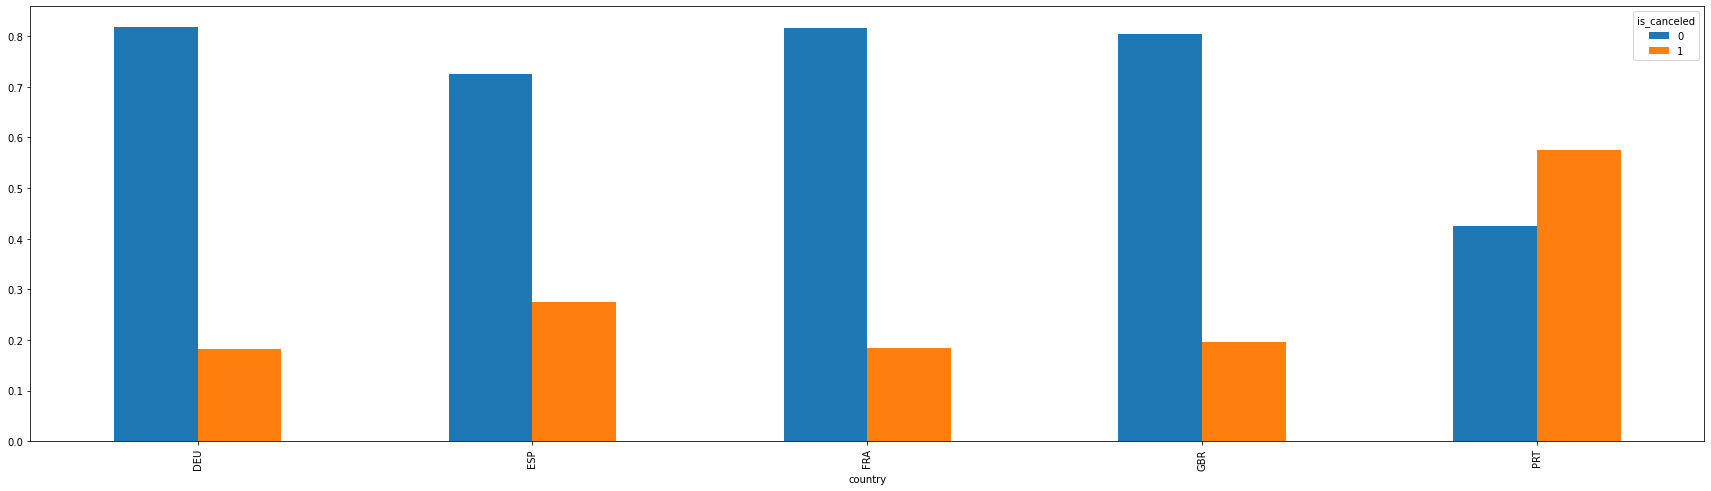

In [81]:
data_prob_canceled_by_country.plot.bar(figsize=(30,8))

Podemos observar que el ratio de cancelaciones en portugal es bastante mas alto al del resto de los paises top de nuestro dataset.

#### 3.2.15 Market segment

La variable market segment representa el segmento de mercado que ha realizado la contratacion. Es una varibale categorica con 7 valores distintos.
El término "TA" significa "Agentes de Viaje" y "TO" significa "Operadores Turísticos"

In [82]:
data.market_segment.describe()

count         10000
unique            7
top       Online TA
freq           4791
Name: market_segment, dtype: object

In [83]:
data.market_segment.value_counts()

Online TA        4791
Offline TA/TO    1986
Groups           1632
Direct           1082
Corporate         431
Complementary      57
Aviation           21
Name: market_segment, dtype: int64

In [84]:
data_prob_canceled_by_market = pd.crosstab(data['market_segment'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_market

is_canceled,0,1
market_segment,,
Aviation,0.761905,0.238095
Complementary,0.894737,0.105263
Corporate,0.777262,0.222738
Direct,0.843808,0.156192
Groups,0.380515,0.619485
Offline TA/TO,0.662135,0.337865
Online TA,0.625757,0.374243


<AxesSubplot:xlabel='market_segment'>

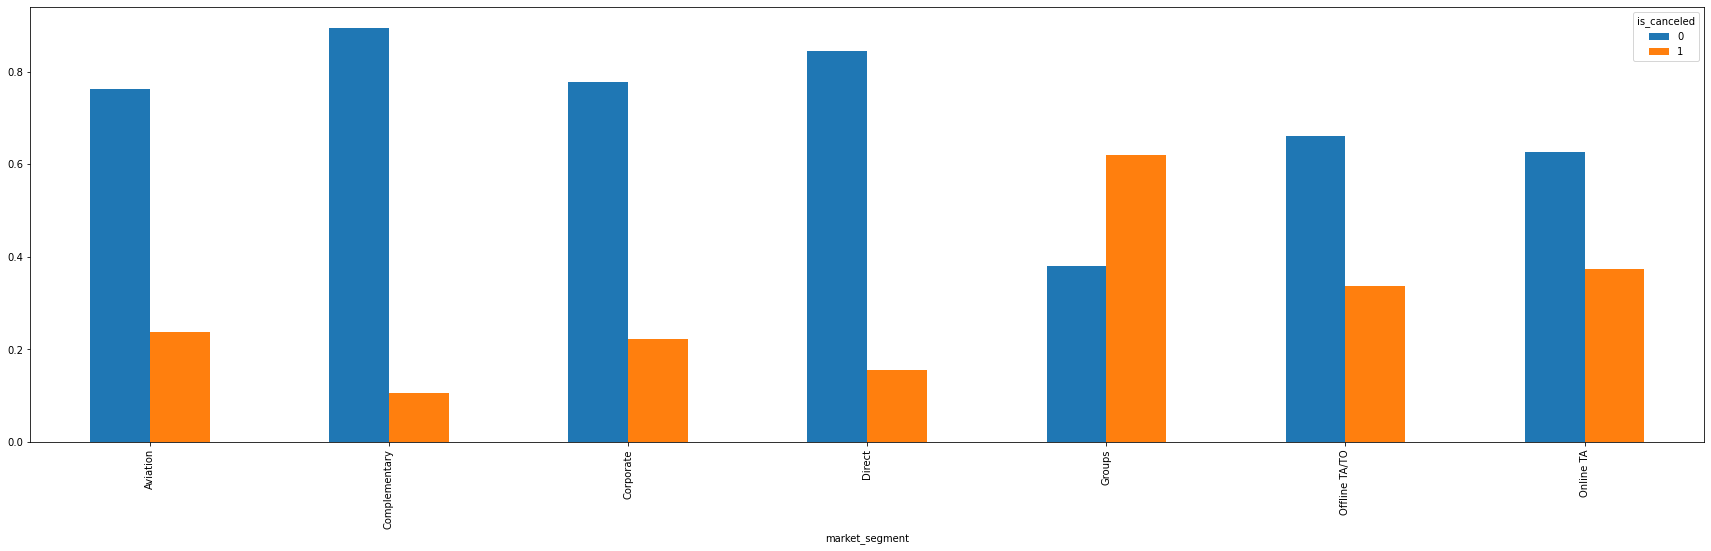

In [85]:
data_prob_canceled_by_market.plot.bar(figsize=(30,8))

Podemos observar que las reservas de grupos son las mas propensas a cancelar las reservas, siendo esta la opcion mas habital. En el lado opuesto tenemos el caso de la aviación.

#### 3.2.16 Distribution channel

Canal de distribución de reservas. El término "TA" significa "Agentes de Viaje" y "TO" significa "Operadores Turísticos"

In [86]:
data.distribution_channel.describe()

count     10000
unique        4
top       TA/TO
freq       8201
Name: distribution_channel, dtype: object

In [87]:
data.distribution_channel.value_counts()

TA/TO        8201
Direct       1237
Corporate     551
GDS            11
Name: distribution_channel, dtype: int64

In [88]:
data_prob_canceled_by_market = pd.crosstab(data['distribution_channel'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled_by_market

is_canceled,0,1
distribution_channel,,
Corporate,0.754991,0.245009
Direct,0.825384,0.174616
GDS,0.636364,0.363636
TA/TO,0.585904,0.414096


<AxesSubplot:xlabel='distribution_channel'>

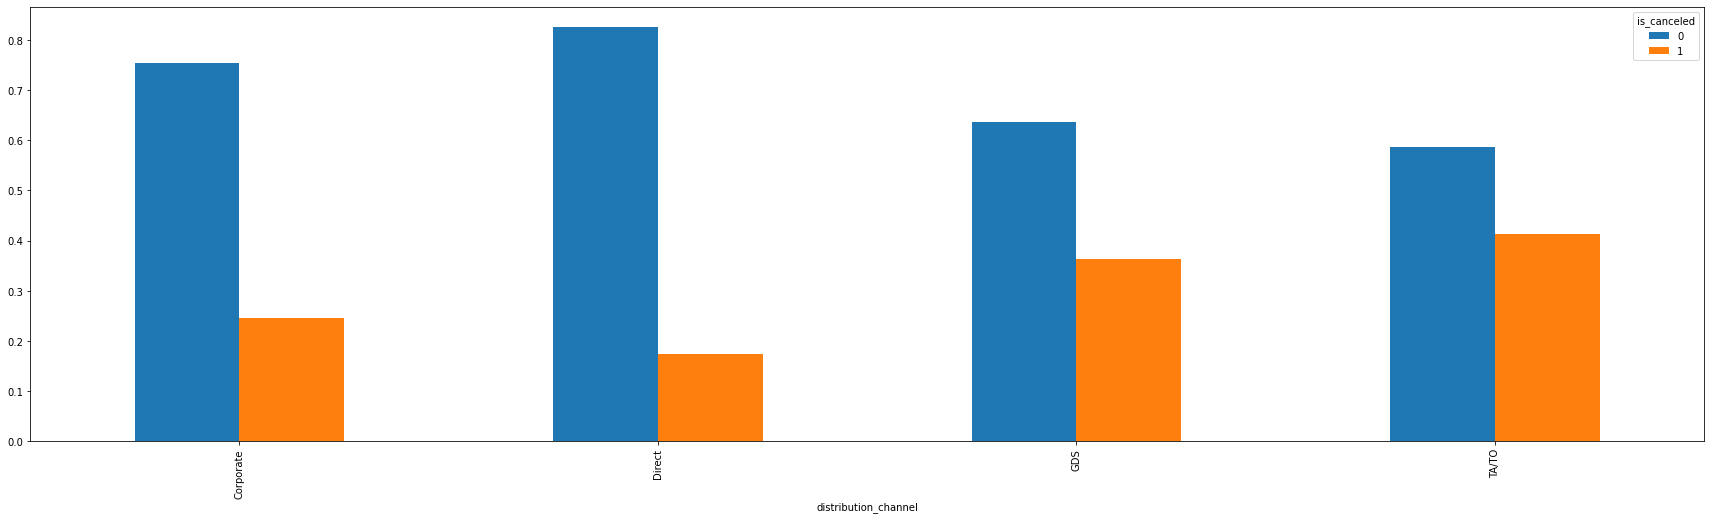

In [89]:
data_prob_canceled_by_market.plot.bar(figsize=(30,8))

Podemos observar que las reservas por TA/TO suelen cancelarse más amenudo

#### 3.2.17 Is repeated guest

Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0)

In [90]:
data.is_repeated_guest.describe()

count    10000.000000
mean         0.031900
std          0.175743
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: is_repeated_guest, dtype: float64

In [91]:
data.is_repeated_guest.sum()

319

In [92]:
data_repeted_guest=data[data.is_repeated_guest==1]
data_repeted_guest.is_canceled.sum()

52

In [93]:
data_repeted_guest=data[data.is_repeated_guest==0]
data_repeted_guest.is_canceled.sum()

3699

Podemos observar que de los repetidor, solo 52 cancelaron su viaje, es decir, 16%. Frente a los no repetidores, entre los que la tasa de cancelacion es 38%

#### 3.2.18 Previous cancellations

Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual

In [94]:
data.previous_cancellations.describe()

count    10000.000000
mean         0.087500
std          0.852242
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         26.000000
Name: previous_cancellations, dtype: float64

In [95]:
data.previous_cancellations.value_counts()

0     9473
1      481
2       16
3       10
24       4
14       2
6        2
13       2
4        2
19       2
11       2
26       2
25       2
Name: previous_cancellations, dtype: int64

In [96]:
data_prob_canceled = pd.crosstab(data['previous_cancellations'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_canceled

is_canceled,0,1
previous_cancellations,,
0,0.654597,0.345403
1,0.054054,0.945946
2,0.687500,0.312500
3,0.600000,0.400000
4,0.500000,0.500000
6,0.500000,0.500000
11,1.000000,0.000000
13,0.500000,0.500000
14,0.000000,1.000000


<AxesSubplot:xlabel='previous_cancellations'>

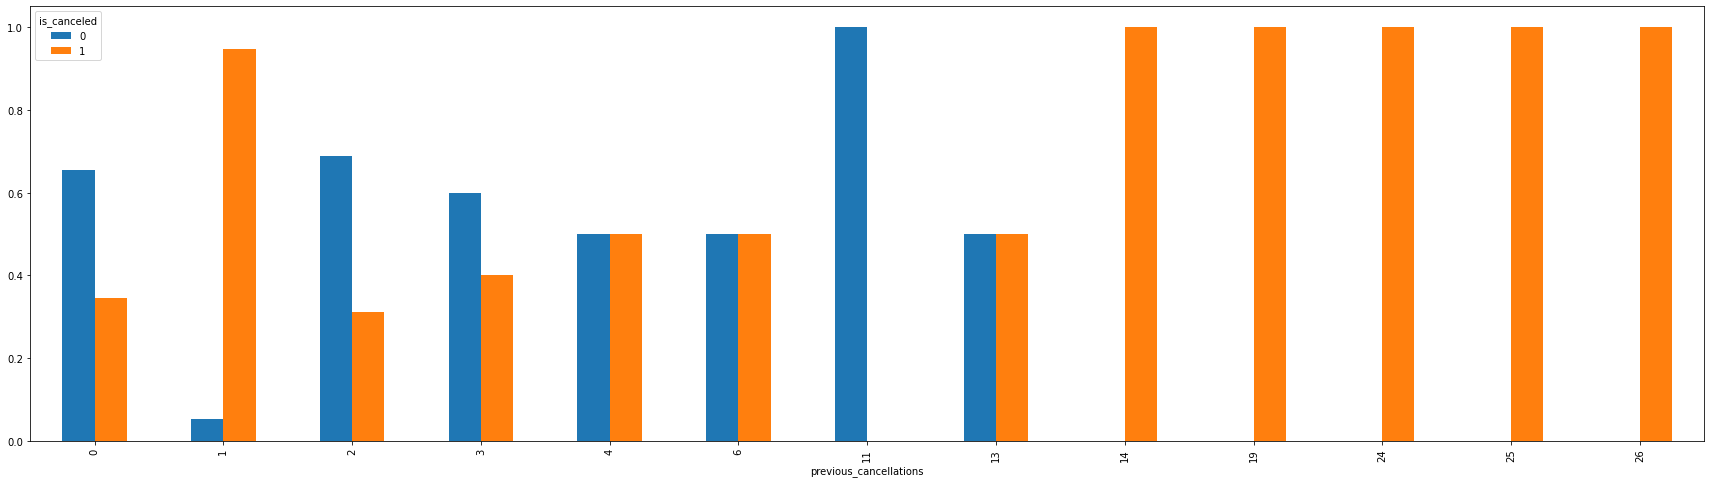

In [97]:
data_prob_canceled.plot.bar(figsize=(30,8))

Podemos observar, que la tónica general es no tener cancelaciones previas. Pero a mayor número de cancelaciones previas, se cancela menos la reserva.

#### 3.2.19 Previous bookings not canceled

Número de reservas anteriores no canceladas por el cliente antes de la reserva actual

In [98]:
data.previous_bookings_not_canceled.describe()

count    10000.000000
mean         0.127400
std          1.269067
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         60.000000
Name: previous_bookings_not_canceled, dtype: float64

<AxesSubplot:xlabel='previous_bookings_not_canceled'>

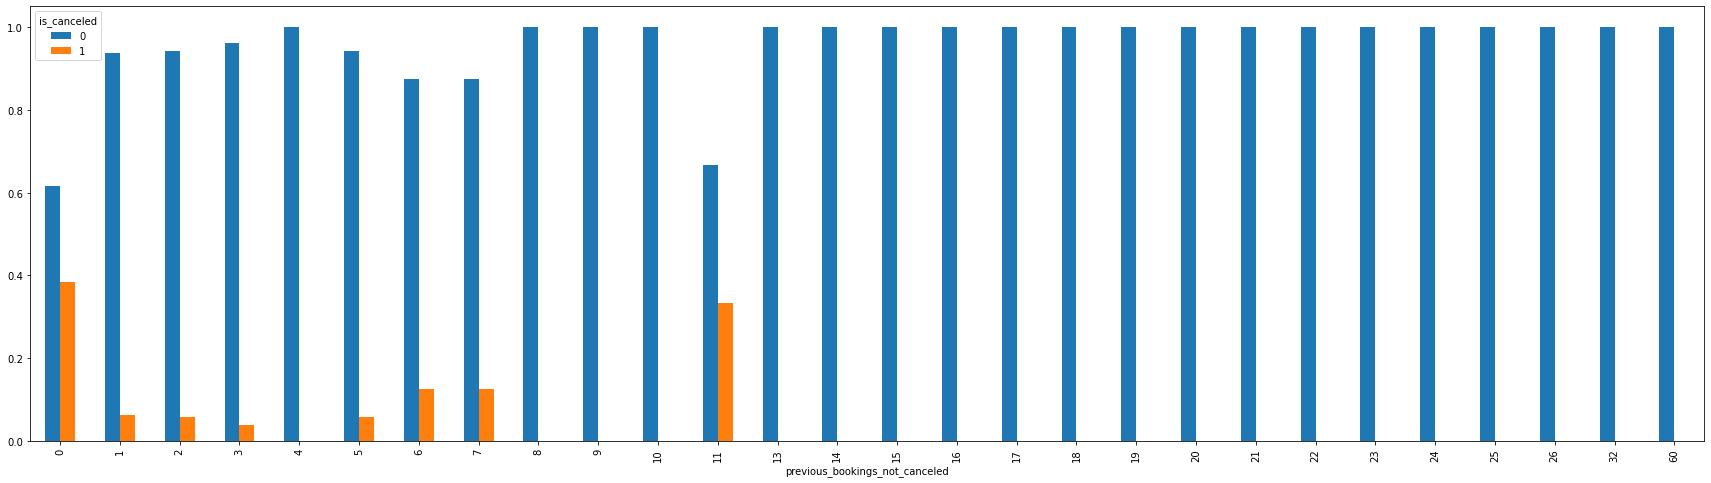

In [99]:
data_prob_ncanceled = pd.crosstab(data['previous_bookings_not_canceled'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_ncanceled.plot.bar(figsize=(30,8))

Podemos observar, que el comportamiento es similar al caso anterior, es decir, aquellos con pocas cancelaciones previas, es mas probable que cancelen, pero a mayor numero de cancelaciones general, es mas dificil que sea cancelado.

#### 3.2.20 Reserved room type

Código de tipo de habitación reservada. El código se presenta en lugar de la designación por razones de anonimato.

In [100]:
data.reserved_room_type.describe()

count     10000
unique       10
top           A
freq       7118
Name: reserved_room_type, dtype: object

In [101]:
data.reserved_room_type.value_counts()

A    7118
D    1630
E     576
F     254
G     212
B      84
C      79
H      45
P       1
L       1
Name: reserved_room_type, dtype: int64

In [102]:
data_prob_res = pd.crosstab(data['reserved_room_type'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res

is_canceled,0,1
reserved_room_type,,
A,0.605929,0.394071
B,0.702381,0.297619
C,0.708861,0.291139
D,0.667485,0.332515
E,0.701389,0.298611
F,0.681102,0.318898
G,0.627358,0.372642
H,0.488889,0.511111
L,1.000000,0.000000


<AxesSubplot:xlabel='reserved_room_type'>

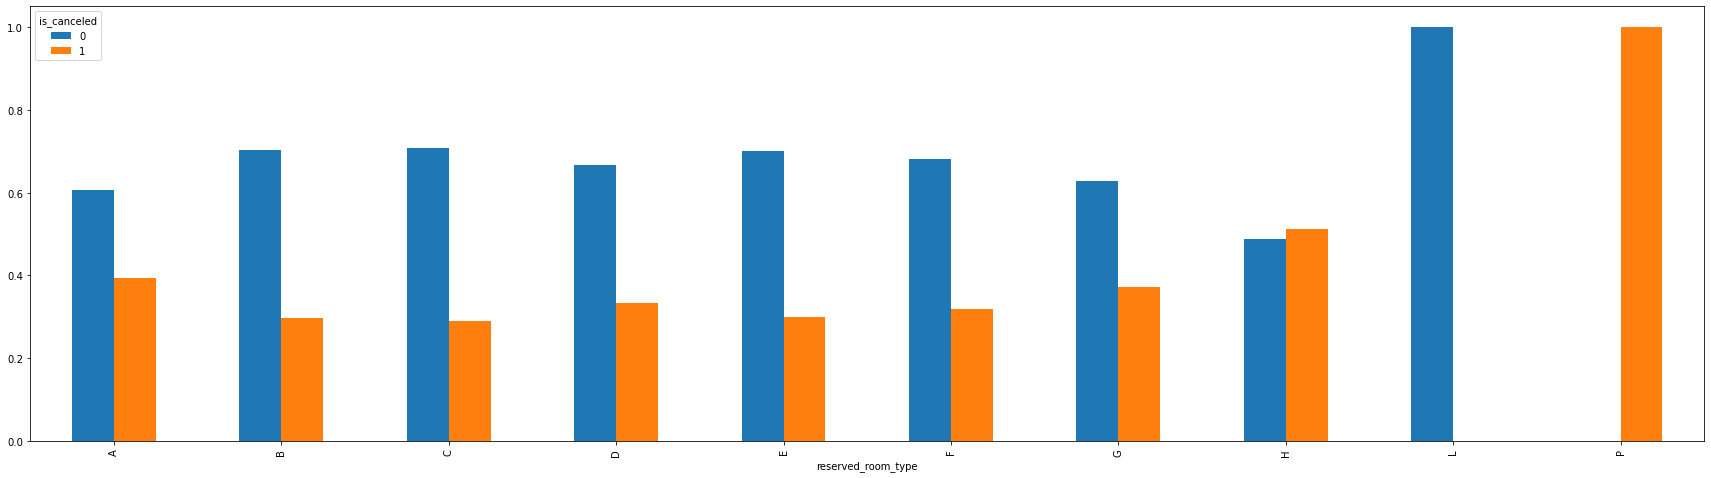

In [103]:
data_prob_res.plot.bar(figsize=(30,8))

Podemos observar que las cancelaciones son similares en todos los tipos de habitacion reservada, salvo en 3 casos llamativos:
* Tipo H donde las cancelaciones son ligeramente superiores
* Tipo L no existen cancelaciones
* Tipo P solo existen cancelaciones

#### 3.2.21 Assigned room type

Código del tipo de habitación asignada a la reserva. A veces el tipo de habitación asignada difiere del tipo de habitación reservada debido a razones de operación del hotel (por ejemplo, sobreventa) o por petición del cliente. El código se presenta en lugar de la designación por razones de anonimato.

In [104]:
data.assigned_room_type.describe()

count     10000
unique       11
top           A
freq       6147
Name: assigned_room_type, dtype: object

In [105]:
data.assigned_room_type.value_counts()

A    6147
D    2136
E     661
F     333
G     252
C     201
B     161
H      60
I      30
K      18
P       1
Name: assigned_room_type, dtype: int64

Puede ser interesante si los tipos asignados son los tipos reservados, y la relación que ello tiene con la cancelación de la reserva

#### 3.2.22 Booking changes

Número de cambios/enmiendas hechos a la reserva desde el momento en que la reserva fue ingresada en el PMS hasta el momento del registro o cancelación.

In [106]:
data.booking_changes.describe()

count    10000.000000
mean         0.218700
std          0.684045
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         16.000000
Name: booking_changes, dtype: float64

In [107]:
data.booking_changes.value_counts()

0     8535
1     1034
2      286
3       85
4       32
5       13
6        6
7        3
9        2
16       2
14       1
12       1
Name: booking_changes, dtype: int64

In [108]:
data_prob_res = pd.crosstab(data['booking_changes'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res

is_canceled,0,1
booking_changes,,
0,0.588869,0.411131
1,0.845261,0.154739
2,0.821678,0.178322
3,0.823529,0.176471
4,0.718750,0.281250
5,0.769231,0.230769
6,0.833333,0.166667
7,1.000000,0.000000
9,0.500000,0.500000


<AxesSubplot:xlabel='booking_changes'>

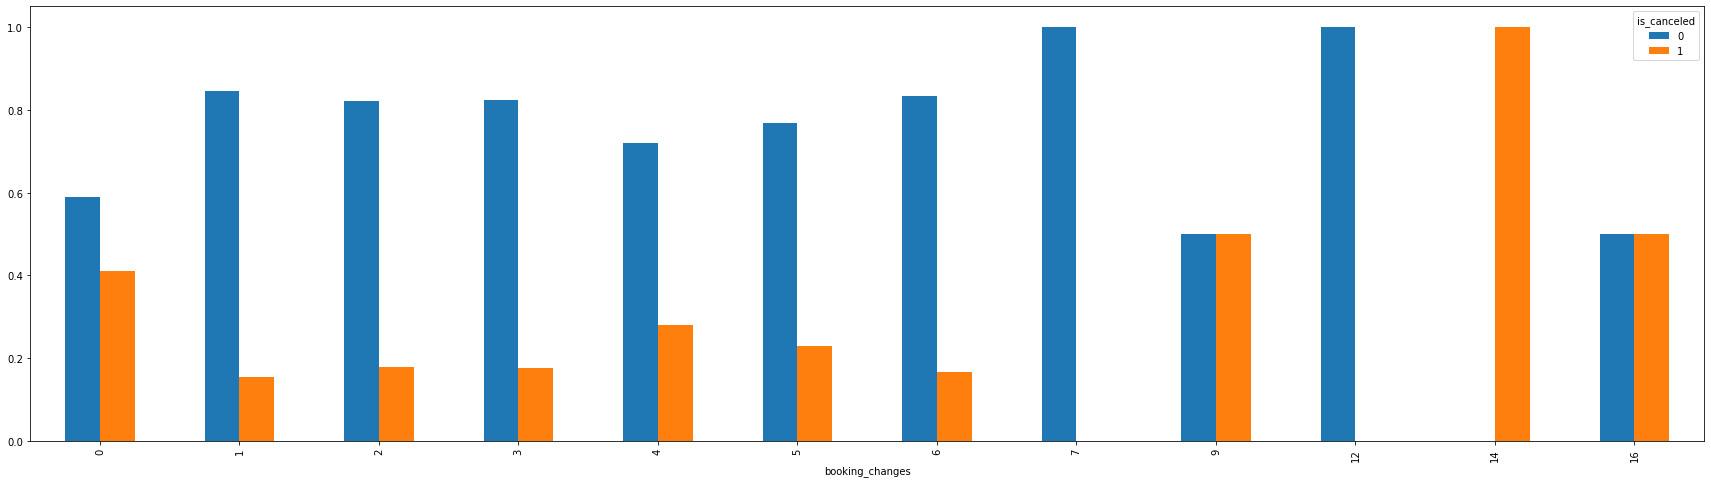

In [109]:
data_prob_res.plot.bar(figsize=(30,8))

Podemos destacar que las cancelaciones aumentan cuando sufren un mayor numero de cambios en las reservas, ademas para cambios pequeños, las reservas no se resienten en terminos de cancelación

#### 3.2.23 Deposit type

Indicación sobre si el cliente hizo un depósito para garantizar la reserva. Esta variable puede asumir tres categorías: No Deposito - no se hizo ningún depósito; No Reembolso - se hizo un depósito con un valor por debajo del costo total de la estancia.

In [110]:
data.deposit_type.describe()

count          10000
unique             3
top       No Deposit
freq            8797
Name: deposit_type, dtype: object

In [111]:
data.deposit_type.value_counts()

No Deposit    8797
Non Refund    1195
Refundable       8
Name: deposit_type, dtype: int64

In [112]:
data_prob_res = pd.crosstab(data['deposit_type'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res

is_canceled,0,1
deposit_type,,
No Deposit,0.709105,0.290895
Non Refund,0.003347,0.996653
Refundable,0.875000,0.125000


<AxesSubplot:xlabel='deposit_type'>

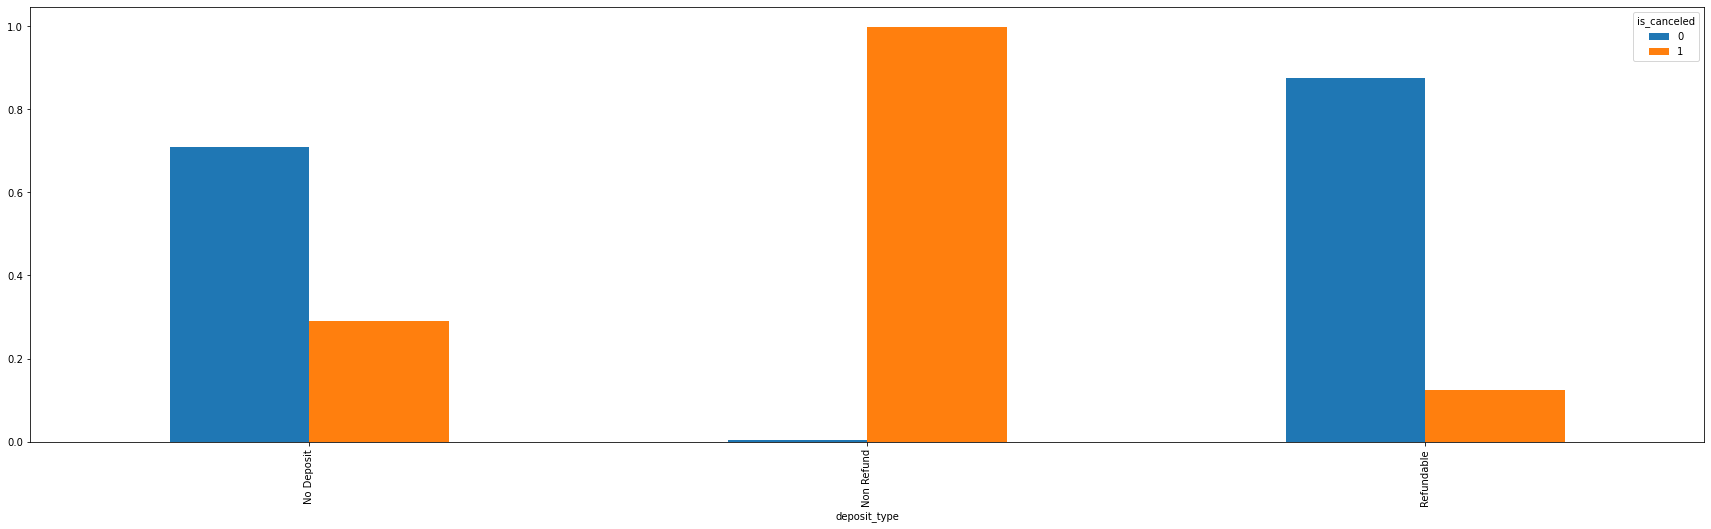

In [113]:
data_prob_res.plot.bar(figsize=(30,8))

Muy destacable que las reservas sin refound son las mas canceladas

#### 3.2.24 Agent


La identificación de la agencia de viajes que hizo la reserva

In [114]:
data.agent.describe()

count    8654.000000
mean       89.090941
std       112.721390
min         1.000000
25%         9.000000
50%        14.000000
75%       240.000000
max       531.000000
Name: agent, dtype: float64

In [115]:
data_prob_res = pd.crosstab(data['agent'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res.head()

is_canceled,0,1
agent,,
1.0,0.256452,0.743548
2.0,0.625000,0.375000
3.0,0.453125,0.546875
4.0,0.750000,0.250000
5.0,0.625000,0.375000


Mucha cardinalidad en la variable, dado que hay 200+ valores de agencia y no tenemos traduccion de estos id (VAR CANDIDATA A DESAPARECER)

#### 3.2.25 Company

La variable company es un identificador de la empresa o entidad que realiza la reserva

In [116]:
data.company.unique()
frecuencia_id_compañia=data.company.value_counts()
porcentaje_frecuencias_id_compañia=data.company.value_counts(40.0)
print("El número de reserva hechas por cada id:",frecuencia_id_compañia)
print("El porcentaje de reservas por cada id:", porcentaje_frecuencias_id_compañia)

El número de reserva hechas por cada id: 40.0     83
223.0    57
45.0     20
153.0    19
219.0    15
         ..
88.0      1
137.0     1
317.0     1
159.0     1
437.0     1
Name: company, Length: 143, dtype: int64
El porcentaje de reservas por cada id: 40.0     0.148479
223.0    0.101968
45.0     0.035778
153.0    0.033989
219.0    0.026834
           ...   
88.0     0.001789
137.0    0.001789
317.0    0.001789
159.0    0.001789
437.0    0.001789
Name: company, Length: 143, dtype: float64


In [117]:
data_prob_res = pd.crosstab(data['company'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res.head()

is_canceled,0,1
company,,
9.0,1.0,0.0
12.0,1.0,0.0
14.0,0.5,0.5
16.0,1.0,0.0
20.0,1.0,0.0


Mucha cardinalidad en la variable, dado que hay 140+ valores de company y no tenemos traduccion de estos id (VAR CANDIDATA A DESAPARECER)

#### 3.2.26 Days in waiting list

Variable cuantitativa que recoge el número de días que pasan hasta que el usuario confirma la reserva

In [118]:
data["days_in_waiting_list"].describe()

count    10000.000000
mean         2.201200
std         17.405235
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        391.000000
Name: days_in_waiting_list, dtype: float64

<AxesSubplot:>

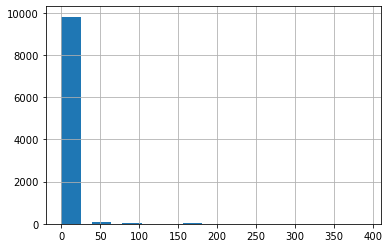

In [119]:
data["days_in_waiting_list"].hist(width=25)

Comparación respecto a la variable is_canceled:

In [120]:
data_prob_res=pd.crosstab(data['days_in_waiting_list'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res.head()

is_canceled,0,1
days_in_waiting_list,,
0,0.634182,0.365818
1,0.500000,0.500000
3,0.000000,1.000000
4,1.000000,0.000000
6,1.000000,0.000000


In [121]:
data["days_in_waiting_list"].median()

0.0

Observamos que en esta variable la desviación típica podría indicar cierta variabilidad pero observando la mediana no se observa tal, por lo que esta se explica por algunos valores anómalos. Lo que observamos es que esta variable no se desvía mucho de cero, lo que nos indica que no tiene mucho potencial explicativo.

#### 3.2.27 Customer type

Variable categórica que clasifica los tipos de reservas en: contractuales, grupales, transitorias o perteneciente a una transitoria:

* Las reservas contractuales son las que tienen una asignación o a algún otro tipo de contrato.

* Las grupales están asociadas a grupos.

* Las transitotorias son las que no están recogidas en ninguna de las categorías anteriores, siendo las pertennecientes a una transitoria (Trasient-party) una reserva asociada a una transitoria (Transient).

In [122]:
data["customer_type"].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

<AxesSubplot:>

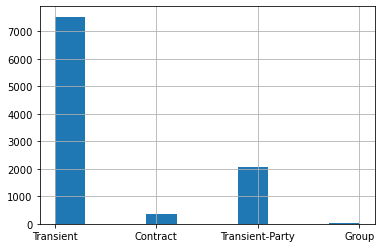

In [123]:
data["customer_type"].hist()

Comparación respecto a la variable is_canceled:

In [124]:
data_prob_res=pd.crosstab(data['customer_type'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res

is_canceled,0,1
customer_type,,
Contract,0.710227,0.289773
Group,0.857143,0.142857
Transient,0.585392,0.414608
Transient-Party,0.749037,0.250963


<AxesSubplot:xlabel='customer_type'>

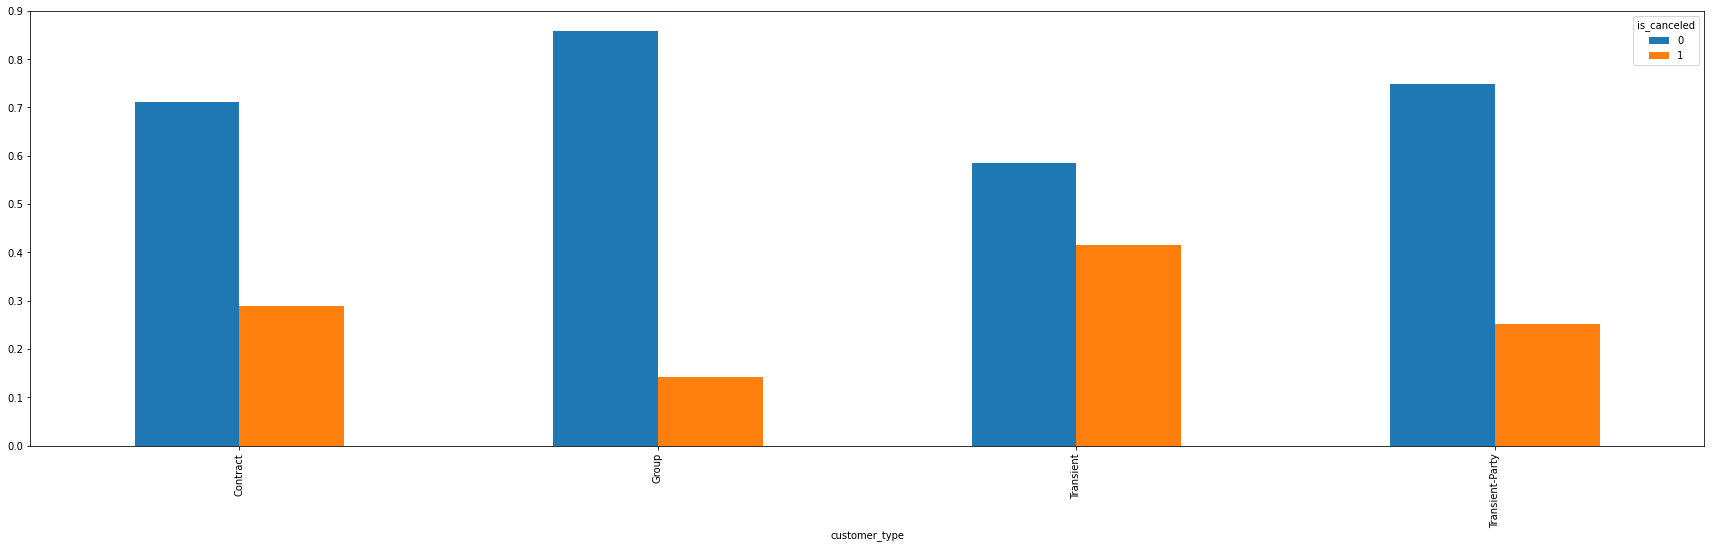

In [125]:
data_prob_res.plot.bar(figsize=(30,8))

Se puede observar que las reservas grupales son las que menos sufren cancelaciones, siendo las transitorias las más canceladas.

#### 3.2.28 ADR

Variable cuantitativa que refleja el ratio entre precio pagado por la reserva o estancia, dividido entre el número de noches de estancia del usuario

In [126]:
data["adr"].describe()

count    10000.000000
mean       102.150192
std         48.778734
min          0.000000
25%         68.530000
50%         94.000000
75%        126.000000
max        388.000000
Name: adr, dtype: float64

<AxesSubplot:>

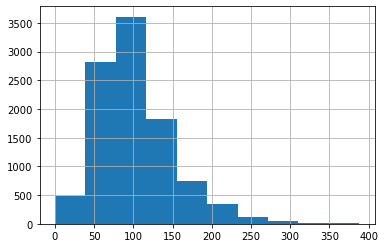

In [127]:
data["adr"].hist()

In [128]:
pd.crosstab(data['adr'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)

is_canceled,0,1
adr,,
0.0,0.901235,0.098765
0.5,0.000000,1.000000
2.0,0.000000,1.000000
4.0,0.500000,0.500000
5.2,1.000000,0.000000
...,...,...
353.0,0.000000,1.000000
359.0,1.000000,0.000000
363.0,0.000000,1.000000


En esta variable observamos que es similar a una distribución exponencial, por lo que sería recomendable transformarla para que su distribución se asemeje más a una normal.

#### 3.2.29 Required car parking spaces

Número de plazas de parking solicitadas por el usuario

In [129]:
data["required_car_parking_spaces"].describe()

count    10000.00000
mean         0.06440
std          0.24629
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max          2.00000
Name: required_car_parking_spaces, dtype: float64

<AxesSubplot:>

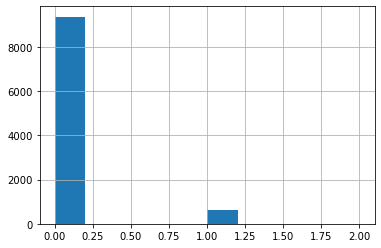

In [130]:
data["required_car_parking_spaces"].hist()

Comparación respecto a la variable is_canceled:

In [131]:
data_prob_res=pd.crosstab(data['required_car_parking_spaces'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res

is_canceled,0,1
required_car_parking_spaces,,
0,0.599166,0.400834
1,1.000000,0.000000
2,1.000000,0.000000


<AxesSubplot:xlabel='required_car_parking_spaces'>

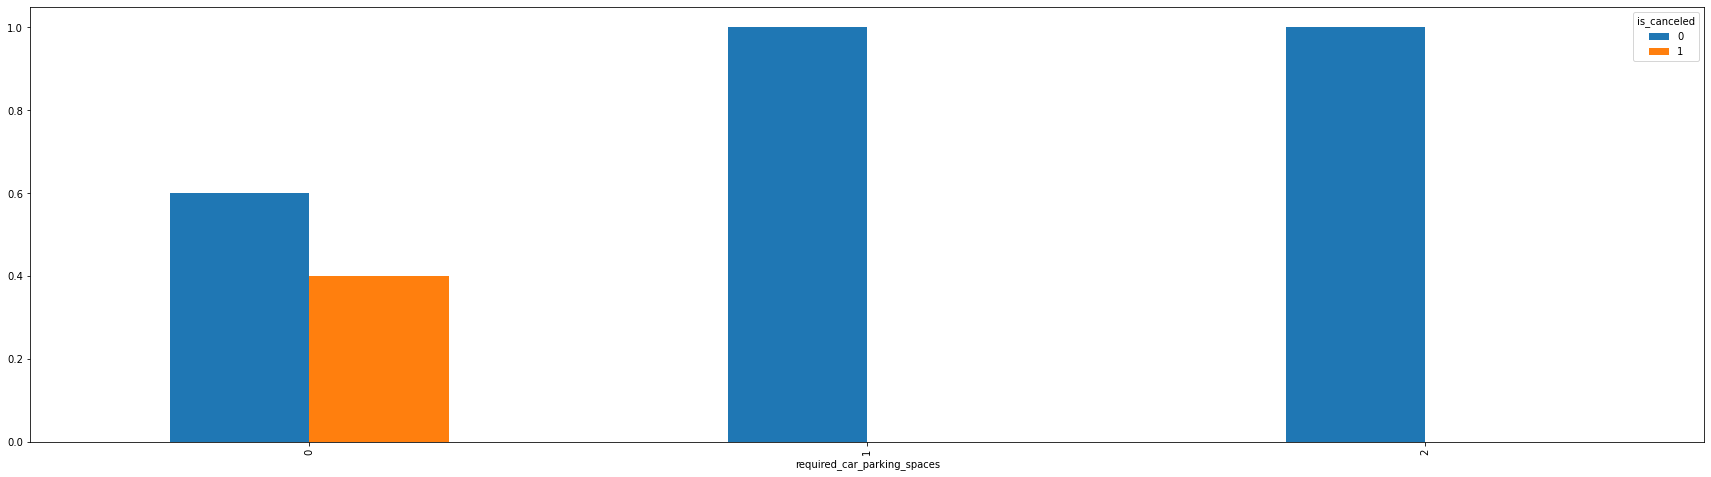

In [132]:
data_prob_res.plot.bar(figsize=(30,8))

En esta variable observamos que las reservas sin petición de plaza d eaparcamiento suelen cancelarse, mientras que las que lo solicitan no se cancelan.

#### 3.2.30 Total of special request

Número total de requisitos especiales solicitados por el usuario.

In [133]:
data["total_of_special_requests"].describe()

count    10000.000000
mean         0.579300
std          0.797731
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: total_of_special_requests, dtype: float64

<AxesSubplot:>

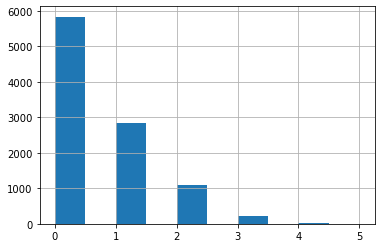

In [134]:
data["total_of_special_requests"].hist()

En esta variable se puede observar una distribución de probabilidad similar a la exponencial, por lo que en el caso de incluirla en el modelo de regresión sería recomendable su transformación.

Comparación respecto is_canceled:

In [135]:
data_prob_res=pd.crosstab(data['total_of_special_requests'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)
data_prob_res

is_canceled,0,1
total_of_special_requests,,
0,0.514580,0.485420
1,0.774648,0.225352
2,0.781481,0.218519
3,0.810427,0.189573
4,0.857143,0.142857
5,1.000000,0.000000


<AxesSubplot:xlabel='total_of_special_requests'>

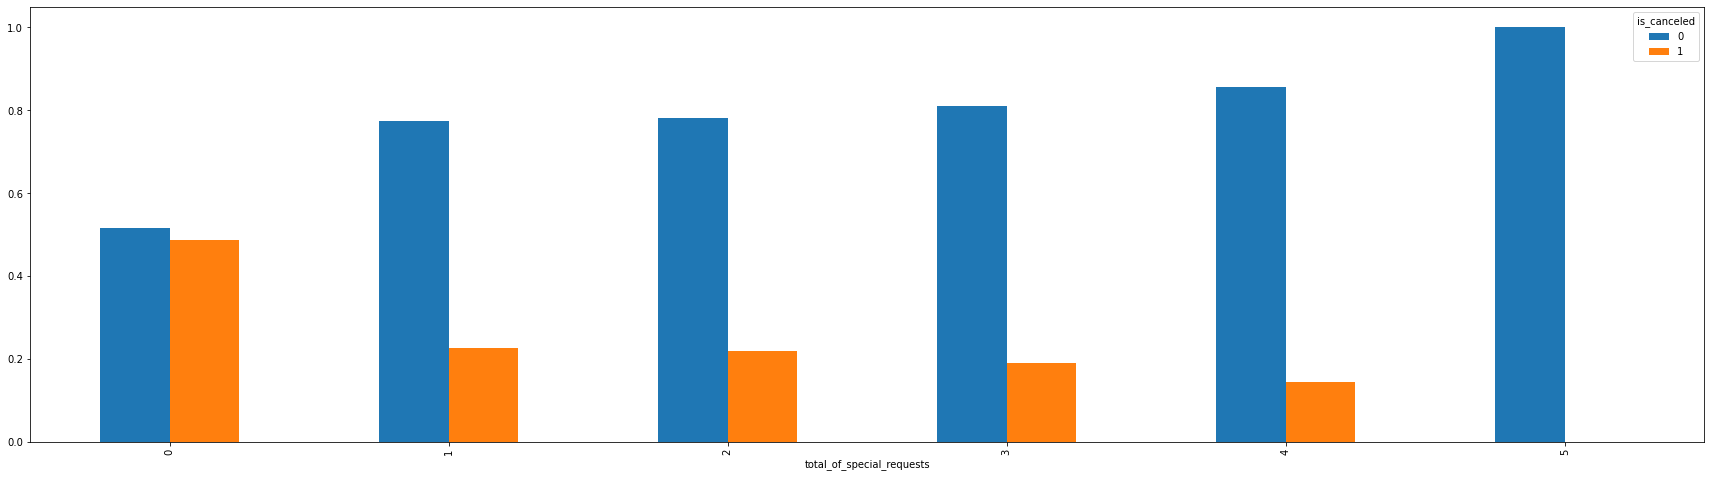

In [136]:
data_prob_res.plot.bar(figsize=(30,8))

Observamos que las reservas sin ninguna petición especial suelen cancelarse en mayor número, las reservas con 5 peticiones especiales no se cancelan.

#### 3.2.31 Reservation status

Último estado de la reserva, variable categórica que clasifica en: cancelado, check-out (finalizada estancia), sin aparecer (el usuario no ha realizado el check in, informando al hotel la razón)

In [137]:
data["reservation_status"].describe()

count         10000
unique            3
top       Check-Out
freq           6249
Name: reservation_status, dtype: object

<AxesSubplot:>

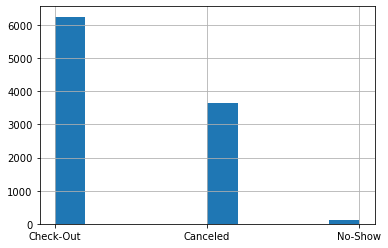

In [138]:
data["reservation_status"].hist()

Comparación respecto la variable is_canceled:

In [139]:
pd.crosstab(data['reservation_status'], data['is_canceled']).apply(lambda r: r/r.sum(), axis=1)

is_canceled,0,1
reservation_status,,
Canceled,0.0,1.0
Check-Out,1.0,0.0
No-Show,0.0,1.0


Esta es una variable cualitativa que se refiere la misma información recogida en la variable "is_canceled", por lo que se descarta para su utilización como variable predictora al ser potencialmente colineal con la variable anteriormente mencionada.

#### 3.2.32 Reservation status date

Fecha de la última actualización del estado de la reserva

In [140]:
data["reservation_status_date"].describe()

count          10000
unique           849
top       2015-10-21
freq             137
Name: reservation_status_date, dtype: object

<AxesSubplot:>

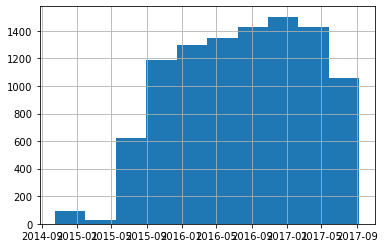

In [141]:
fechas=pd.to_datetime(data["reservation_status_date"])
fechas.hist()

Esta variable consideramos que va a aportar poco a la explicabilidad del modelo de regresión para predecir el número de noches de hospedaje, por lo que es probable que no sea considerada.

## 4. Procesado de variables cualitativas

Procesamos las variables cualitativas de tal forma que estas pasen a ser variables/indicadores dummies.

In [142]:
data_processed = pd.get_dummies(data, columns=["hotel", "meal", "deposit_type"],drop_first=True)

Además, vamos a sintetizar las columnas  "reserved_room_type", "assigned_room_type", en una única feature booleana que sea afirmativa en caso de que la habitación reservada fuera la misma a la asignada y viceversa. Además, eliminaremos la variable "reservation_status", pues su contenido puede ser transcrito de otras variables como is canceled.

In [143]:
pd.set_option("display.max_rows", 20, "display.max_columns", None)
data_processed["reserverd/assigned"]= np.where(data_processed["reserved_room_type"]==data_processed["assigned_room_type"],1 , 0)
data_processed=data_processed.drop(["market_segment", "distribution_channel","reserved_room_type","assigned_room_type","reservation_status"],axis=1)

Por último, vamos a tratar de manera especial la variable "customer_type", puesto que existen dos categorias de esta variable que se encuentran altamente relacionadas, concretamenta esta relación es de contenido entre las categorias Transistent y Transistent-Party. Dado que una categoria se encuentra embebida en otra, vamos a unirlas en una única

In [144]:
data_processed["customer_type"]= np.where(data_processed["customer_type"]=='Transient','Transient-Party',data_processed["customer_type"])
data_processed = pd.get_dummies(data_processed, columns=["customer_type"],drop_first=True)

## 5. Transformación de variables cuantitativas

Las variables de entrada numéricas pueden tener una distribución muy sesgada o no estándar. Esto podría ser causado por valores atípicos en los datos, distribuciones multimodales, distribuciones altamente exponenciales y más.

Muchos algoritmos de aprendizaje automático prefieren o funcionan mejor cuando las variables de entrada numéricas tienen una distribución de probabilidad estándar.

Seleccionaremos para la transformación aquellas variables que son cuantitativas no categóricas, en nuestro caso dos, 'lead_time','adr'.

array([[<AxesSubplot:title={'center':'lead_time'}>,
        <AxesSubplot:title={'center':'adr'}>]], dtype=object)

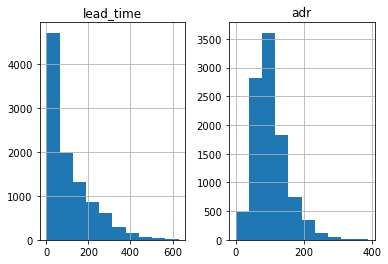

In [145]:
numerical_df = data_processed
numerical_df = numerical_df.select_dtypes(np.number)
numerical_df = numerical_df[['lead_time','adr']]
numerical_df.hist()

Para transformar las distribuciones anteriores, utilizaremos el metodo Power Transformer, con ello, buscamos mejorar la performance de futuros modelos. Las transformaciones de potencia son una familia de transformaciones paramétricas y monótonas que tienen por objeto mapear los datos de cualquier distribución lo más cerca posible de una distribución gaussiana a fin de estabilizar la varianza y reducir al mínimo la asimetría.

El transformador de potencia proporciona actualmente dos de esas transformaciones de potencia, la transformación de Yeo-Johnson y la de Box-Cox. Usaremos la transformación Yeo-Johnson, pues tenemos valores incomplatibles con Box-Cox (Valores no estrictamente positivos).

array([[<AxesSubplot:title={'center':'lead_time_trans'}>,
        <AxesSubplot:title={'center':'adr_trans'}>]], dtype=object)

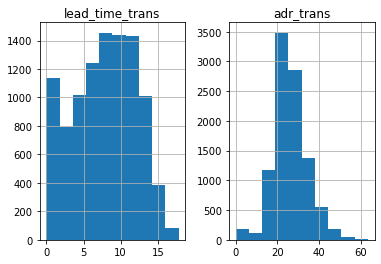

In [146]:
#yeo-johnson
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=False)
numerical_df_yeo = pt.fit_transform(numerical_df)
res = pd.DataFrame(numerical_df_yeo,columns=['lead_time_trans','adr_trans'])
data_processed[['lead_time','adr']]=res
res.hist()

## 6. Detección, tratamiento e imputación de datos faltantes

Debido a que nuestro dataset no tiene muchos datos faltantes, y gracias al análisis previo, se han estudiado variables sin datos faltantes pero con datos ilógicos que podrían ser tratados como tal.

Para tratar con los datos faltantes vamos a usar las librerías IterativeImputer y KNNImputer. Primero vamos a contar cuantos "null" hay en total.

In [147]:
data.isnull().sum()

hotel                        0
is_canceled                  0
lead_time                    0
arrival_date_year            0
arrival_date_month           0
                            ..
total_of_special_requests    0
reservation_status           0
reservation_status_date      0
arrival_datetime             0
arrival_month                0
Length: 34, dtype: int64

Podemos ver que solo hay tres variables con valores "null". Pero vamos a ver otras variables que pueden contener datos faltantes aunque no tengan "null".

Precisamente las variables en las que hay valores "null", no nos valen. Ya que Country es una variable categórica y Agent y Company son identificadores únicos. Sin embargo, hay otras variables sin valores "null" pero de las que se pueden obtener datos faltantes (como 0 por ejemplo) en función de lo que significa cada variable.

### 6.1 Lead time
Esta variable mide el número de días que transcurrieron entre la fecha de entrada de la reserva y la fecha de llegada por lo que se puede considerar como dato faltante si se tiene el valor 0. Lo haremos así para tener más datos faltantes.

In [148]:
data_processed[data_processed['lead_time'] == 0].head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,country,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,arrival_datetime,arrival_month,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_Non Refund,deposit_type_Refundable,reserverd/assigned,customer_type_Group,customer_type_Transient-Party
6333,0,0.0,2015,July,27,2,0,1,2,0.0,0,PRT,0,0,0,0,NaN,NaN,0,20.469977,0,0,2015-07-03,2015-07-02,07,1,0,0,0,0,0,0,1,0,1
6807,0,0.0,2015,July,28,5,4,5,2,2.0,0,CHE,0,0,0,1,240.0,NaN,0,20.064860,1,1,2015-07-14,2015-07-05,07,1,0,0,0,0,0,0,1,0,1
1648,0,0.0,2015,July,28,8,0,2,2,0.0,0,PRT,0,0,0,0,1.0,NaN,0,13.842326,0,0,2015-07-10,2015-07-08,07,0,0,0,0,0,0,0,1,0,1
312,0,0.0,2015,July,29,12,2,3,2,2.0,0,IRL,0,0,0,0,240.0,NaN,0,30.919891,0,1,2015-07-17,2015-07-12,07,1,0,0,0,0,0,0,1,0,1
2547,0,0.0,2015,July,29,14,2,8,2,0.0,0,BRA,0,0,0,0,156.0,NaN,0,15.716022,0,0,2015-07-24,2015-07-14,07,1,0,0,0,0,0,0,1,0,0


### 6.2 Adults
 
Esta variable mide el número de adultos en la reserva, por lo que se puede considerar como dato faltante si se tiene el valor 0, ya que entendemos que solo se pueden realizar reservas por adultos (para así tener más datos faltantes).

In [149]:
data_processed[data_processed['adults'] == 0][['adults', 'children', 'babies']].head()

,adults,children,babies
1825,0,0.0,0
9879,0,2.0,0
4060,0,0.0,0
3431,0,3.0,0
8470,0,2.0,0


#### Iterative Imputer
Vamos a imputar los datos faltantes, teniendo en cuenta solo las variables Adults, Children y Babies, ya que después se hará con todo el dataframe.

In [150]:
data_adults = data_processed[['adults', 'children', 'babies']]

In [151]:
imp = IterativeImputer(max_iter = 10, random_state = 0)
data_adults = imp.fit_transform(data_adults)
data_adults = pd.DataFrame(data=data_adults, columns=['adults', 'children', 'babies'])
data_adults.head()

,adults,children,babies
0,2.0,0.0,0.0
1,2.0,0.0,0.0
2,1.0,0.0,0.0
3,2.0,0.0,0.0
4,2.0,0.0,0.0


#### KNNImputer

In [152]:
data_adults = data_processed[['adults', 'children', 'babies']]
imp = KNNImputer(n_neighbors=4, weights="uniform")
data_adults = imp.fit_transform(data_adults)
data_adults = pd.DataFrame(data=data_adults, columns=['adults', 'children', 'babies'])
data_adults.head()

,adults,children,babies
0,2.0,0.0,0.0
1,2.0,0.0,0.0
2,1.0,0.0,0.0
3,2.0,0.0,0.0
4,2.0,0.0,0.0


### 6.3 All Dataset

##### Iterative Imputer

Por último, realizamos la imputacion de los datos faltantes con todas las columnas, para ver el resultado. Quitamos las variables del tipo string para poder realizar el proceso.

In [153]:
data_imputer = data_processed.drop(['country','arrival_date_month', 'reservation_status_date', 'arrival_datetime','agent','company'], axis=1)
data_imputer['adults'] = data_imputer['adults'].replace(0, np.nan)
data_imputer['lead_time'] = data_imputer['lead_time'].replace(0, np.nan)

In [154]:
imp = IterativeImputer(max_iter = 3, random_state = 0,verbose=1)
data_iterative_imputer = imp.fit(data_imputer)
data_iterative_imputer = imp.transform(data_imputer)

[IterativeImputer] Completing matrix with shape (10000, 29)
[IterativeImputer] Change: 0.46619196964592113, scaled tolerance: 2.017 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (10000, 29)


In [155]:
df_imputer=pd.DataFrame(data_iterative_imputer,columns=data_imputer.columns)
df_imputer.isna().sum()

is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_week_number         0
arrival_date_day_of_month        0
                                ..
deposit_type_Non Refund          0
deposit_type_Refundable          0
reserverd/assigned               0
customer_type_Group              0
customer_type_Transient-Party    0
Length: 29, dtype: int64

Como podemos observar las variables con valores faltantes han sido imputadas, vamos a realizar un pequeño análisis de cambio de los principales estadisticos de nuestro DataFrame

In [156]:
data_imputer['adults'].describe()

count    9974.000000
mean        1.874474
std         0.565639
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max        27.000000
Name: adults, dtype: float64

In [157]:
df_imputer['adults'].describe()

count    10000.000000
mean         1.874585
std          0.565010
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         27.000000
Name: adults, dtype: float64

Podemos observar que la variación de los principales estadisticos es minima, señal del bnuen funcionamiento del método de imputacion utilizado.

## 7. Selección de variables

### Recapitulación
Vamos a realizar un pequeño sumario de lo que tenemos a estas alturas en nuestro dataframe original, para ver el estado de las variables

In [158]:
pd.set_option("display.max_rows", 20, "display.max_columns", None)
data_processed = df_imputer
data_processed

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_month,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_Non Refund,deposit_type_Refundable,reserverd/assigned,customer_type_Group,customer_type_Transient-Party
0,0.0,9.305819,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.932495,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,3.566316,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.861284,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.687802,2015.0,27.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,23.932495,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,10.577670,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.362916,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,12.476864,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.347156,0.0,0.0,7.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.282752,2017.0,35.0,31.0,0.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,23.562384,0.0,2.0,8.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9996,0.0,6.849547,2017.0,35.0,31.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.825797,0.0,2.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9997,1.0,13.378198,2017.0,35.0,31.0,2.0,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.613807,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
9998,0.0,11.785583,2017.0,35.0,31.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,39.413648,0.0,2.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### Variable Objetivo
Como podemos observar, nuestra variable a predecir se encuentra dividida en dos columnas, de modo que vamos a sintetizar informacion en una única columna, retirando las otras dos.

In [159]:
data_processed['stays_nights']=data_processed.stays_in_weekend_nights+data_processed.stays_in_week_nights
data=data_processed.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis=1)

Además, vamos a retirar la variable arrival_date_week_number, puesto que con el día, mes y año es más que suficiente para la identificacion de la fecha de la reserva

In [160]:
data_processed=data_processed.drop(['arrival_date_week_number'],axis=1)

Pasamos todas las columnas numéricas a entero para normalizar los tipos de las distintas variables.

In [161]:
data=data.drop(['arrival_date_year'],axis=1)
columns_ints=['is_canceled','arrival_date_day_of_month', 'adults', 'children', 'babies',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'arrival_month', 'hotel_Resort Hotel',
       'meal_FB', 'meal_HB', 'meal_SC', 'meal_Undefined',
       'deposit_type_Non Refund', 'deposit_type_Refundable',
       'reserverd/assigned', 'customer_type_Group',
       'customer_type_Transient-Party', 'stays_nights']
data[columns_ints] = data[columns_ints].astype(int)

### Train y Test

Separamos entre variables predictoras y predecida en primer lugar, seguidamente, realizaremos particiones para entrenar y validar el modelo, pàra ello, haremos uso de la función de sklearn de model_selection

In [162]:
Y = data.stays_nights
X = data.loc[:, data.columns != 'stays_nights']

Vamos a dividir nuestro conjunto de datos en train y test, tanto para las posibles variables predictoras como para la varabiable  a predecir

In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (6700, 26) (6700,)
Test (3300, 26) (3300,)


### Variance Threshold

Procedemos a eliminar las variables con menor varianza usando Variance Threshold. Con ello se pretende la identificación de las variables que poseen menor varianza, para evitar su coinsideracióin en los modelos.

In [164]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0.05)
constant_filter.fit(X_train)

VarianceThreshold(threshold=0.05)

In [165]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

7


Vemos que hay 7 variables con una varianza menor a 0.05, vamos a ver cuales son.

In [166]:
for column in constant_columns:
    print(column)

babies
is_repeated_guest
meal_FB
meal_Undefined
deposit_type_Refundable
customer_type_Group
customer_type_Transient-Party


De estas variables creemos que "babies" y "is_repeated_guest" son detalles importantes aún teniendo una baja varianza, por lo que son candidatas a no ser seleccionadas para el entrenamiento de los modelos.

### Correlación de variables

Vamos a realizar un analisis de correlación para eliminar aquellas variables que se encuentren altamente correlacionadas.

In [167]:
corr_matrix = X_train.corr(method="pearson")
corr_matrix.style.background_gradient(cmap='coolwarm')

,is_canceled,lead_time,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,arrival_month,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_Non Refund,deposit_type_Refundable,reserverd/assigned,customer_type_Group,customer_type_Transient-Party
is_canceled,1.000000,-0.006892,0.012759,-0.000082,0.077312,0.013316,-0.025681,-0.083197,0.106092,-0.075700,-0.120142,0.062679,0.001734,-0.204059,-0.243185,0.015520,-0.131016,0.036254,-0.007860,-0.008103,-0.022002,0.475914,-0.013101,0.252998,-0.038564,0.053121
lead_time,-0.006892,1.000000,0.013464,-0.012340,0.008883,0.010313,0.002866,0.005239,0.000925,0.002379,-0.009806,-0.021897,-0.009828,0.002271,-0.005142,0.014791,-0.007055,-0.035503,-0.008928,0.002726,-0.000062,-0.021360,-0.013682,0.005685,0.011695,-0.010084
arrival_date_week_number,0.012759,0.013464,1.000000,0.074355,0.028336,-0.002304,0.003740,-0.036078,0.029056,-0.034928,-0.001744,0.011394,0.003353,-0.003678,0.016951,0.995135,0.016178,0.026930,0.038876,-0.051606,-0.017807,0.008441,-0.012247,-0.009600,0.016768,-0.100986
arrival_date_day_of_month,-0.000082,-0.012340,0.074355,1.000000,0.011538,-0.000017,-0.010222,-0.012993,-0.018531,0.013098,0.009348,0.029826,0.011080,0.005424,-0.000525,-0.018012,0.025412,-0.005262,0.006084,-0.015513,0.015756,-0.007932,0.023153,0.018114,-0.010217,0.000235
adults,0.077312,0.008883,0.028336,0.011538,1.000000,0.072930,0.017057,-0.172669,-0.004710,-0.165597,-0.030608,-0.005298,-0.006865,0.019952,0.165244,0.030389,0.002099,0.013546,0.054860,-0.000491,0.012064,-0.028313,0.007997,0.065136,-0.033800,0.002309
children,0.013316,0.010313,-0.002304,-0.000017,0.072930,1.000000,0.039138,-0.036465,-0.026505,-0.028146,0.051816,-0.033667,0.018593,0.024159,0.083215,-0.001110,0.034535,0.001368,0.022760,-0.071242,-0.013162,-0.098787,-0.007909,0.017247,-0.017716,0.033426
babies,-0.025681,0.002866,0.003740,-0.010222,0.017057,0.039138,1.000000,-0.007420,-0.007241,-0.010208,0.072670,-0.011395,0.019025,0.064780,0.098561,0.004537,0.039522,-0.008125,0.027960,-0.022028,-0.008569,-0.033708,-0.002699,-0.002034,-0.006045,0.001626
is_repeated_guest,-0.083197,0.005239,-0.036078,-0.012993,-0.172669,-0.036465,-0.007420,1.000000,0.089150,0.505210,0.005197,-0.022164,0.018842,0.066680,0.016139,-0.036833,0.029105,-0.007420,-0.028043,-0.036898,-0.008806,-0.059244,-0.005555,-0.060306,0.087257,0.004440
previous_cancellations,0.106092,0.000925,0.029056,-0.018531,-0.004710,-0.026505,-0.007241,0.089150,1.000000,0.096763,-0.021895,0.004716,-0.011592,-0.013849,-0.052115,0.030284,0.013001,0.191996,0.011410,-0.022340,-0.005988,0.155632,-0.003054,0.031665,-0.001609,-0.020612
previous_bookings_not_canceled,-0.075700,0.002379,-0.034928,0.013098,-0.165597,-0.028146,-0.010208,0.505210,0.096763,1.000000,0.001621,-0.013335,0.013214,0.078637,0.047638,-0.037323,0.005253,-0.008634,-0.031242,-0.029618,-0.010765,-0.042348,-0.003390,-0.035902,0.030331,0.010464


In [168]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

def select_features_corr(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

def select_features_mutual(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Para seleccionar variables este método mide la dependencia entre la variables, para medir esta dependencia utiliza el método de los k-vecinos.

El método de los K-vecinos (K-neighborgs), en regresión, las entradas del algoritmo ***k*** es el número de observaciones por variable que el modelo utiliza para estimar la salida o predicción. Esto es, la predicción es la media de la variable observada ***k*** veces.

Los valores cercanos a cero indican que las variables son independientes, valores más altos señalan una dependecnia más alta.

Como se observa no hya ninguna varible que supere un valor de dependencia de 0.05, por lo que, es difícil justificar la dependencia de las variables predictoras con la variable a predecir.

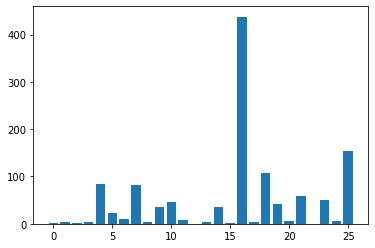

In [169]:
columns=X_train.columns
results_corr=dict()
X_train_fs, X_test_fs, fs = select_features_corr(X_train, y_train, X_test)
for i in range(len(columns)):
    results_corr[columns[i]]=fs.scores_[i]
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()
results_corr= {k: v for k, v in sorted(results_corr.items(), key=lambda item: item[1])}

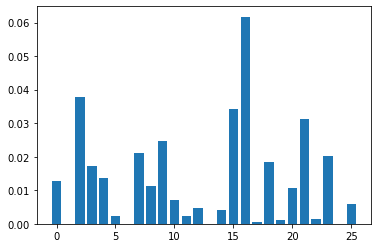

In [170]:
X_train_fs, X_test_fs, fs = select_features_mutual(X_train, y_train, X_test)
results_mut=dict()
for i in range(len(columns)):
    results_mut[columns[i]]=fs.scores_[i]
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()
results_mut= {k: v for k, v in sorted(results_mut.items(), key=lambda item: item[1])}

### Random Forest

Vamos a comprobar cuales son las variables que más aportan al modelo, para eliminar las menos importantes, para ello haremos uso de Random Forest.

Random Forest utiliza árboles de decisión de clasificación en submuestras variables del conjunto de datos y utiliza el promedio para mejorar la precisión de la predicción y controlar el exceso de ajuste. 
El tamaño de la submuestra se controla con el parámetro max_samples si bootstrap=True (por defecto), de lo contrario se utiliza todo el conjunto de datos para construir cada árbol.
 
n_estimators: Es el numero de árboles
 
random_state: Controla tanto la aleatoriedad de las muestras utilizadas al construir los árboles (si bootstrap=True, si no coge todas las variables)
como el muestreo de las características.

In [171]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

rf.fit(X_train, y_train);

In [172]:
feature_list = list(X_train.columns)

# Importances
importances = list(rf.feature_importances_)

# Tuplas variable - importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort importances
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: lead_time            Importance: 0.17
Variable: adr                  Importance: 0.17
Variable: arrival_date_week_number Importance: 0.13
Variable: arrival_date_day_of_month Importance: 0.13
Variable: hotel_Resort Hotel   Importance: 0.06
Variable: customer_type_Transient-Party Importance: 0.05
Variable: total_of_special_requests Importance: 0.04
Variable: arrival_month        Importance: 0.04
Variable: booking_changes      Importance: 0.03
Variable: is_canceled          Importance: 0.02
Variable: adults               Importance: 0.02
Variable: children             Importance: 0.02
Variable: meal_HB              Importance: 0.02
Variable: reserverd/assigned   Importance: 0.02
Variable: is_repeated_guest    Importance: 0.01
Variable: previous_bookings_not_canceled Importance: 0.01
Variable: required_car_parking_spaces Importance: 0.01
Variable: meal_SC              Importance: 0.01
Variable: deposit_type_Non Refund Importance: 0.01
Variable: customer_type_Group  Importance: 0.

## 8. Ajuste, interpretación y diagnosis del modelo de regresión lineal múltiple

### Modelos a planteados

A la vista de los resultados anteriores, realizaremos 4 entrenamientos diferentes:

* El primero de ellos constará de todas las features

* El segundo las mejores features determinadas por f_regression

* El tercero las mejores features determinadas por mutual_info_regression

* El cuarto una mezcla de las mejores consideradas por ambos modelos
    
Por ultimo, evaluaremos un modelo de regresión LASSO (https://machinelearningmastery.com/lasso-regression-with-python/) considerando  10-fold cross-validation (https://scikit-learn.org/stable/modules/linear_model.html)

In [173]:
import statsmodels.api as sm
import lmdiag

def launch_linear_model(input_data,y_train,selected_var=[],with_intercept=1,verbose=1):
    if len(selected_var)>0:
        X_train = input_data[selected_var]
    else:
         X_train = input_data
    if with_intercept==1:
        print('Intercept added')
        X_train = sm.add_constant(X_train)
    print("Training...")
    model = sm.OLS(y_train, X_train)
    results = model.fit()
    if verbose==1:
        print(results.summary())
    if verbose==2:
        print(results.summary())
        print('Calculando plots...')
        lmdiag.plot(results)
    print('Done.')
        
    

### Modelo total_features

En primer lugar entrenamos al modelo con los datos de train.

In [174]:
launch_linear_model(X_train,y_train,verbose=0)

Intercept added
Training...
Done.


### Modelo corr_features

Vamos a seleccionar las variables mas significativas seleccionadas por el modelo que hace uso de las correlaciones, y realizaremos la prueba del ajuste del modelo haciendo uso de esas features

In [175]:
vars_selected=['reserverd/assigned','deposit_type_Non Refund','is_repeated_guest','adults','meal_HB',
                        'customer_type_Transient-Party','hotel_Resort Hotel']
launch_linear_model(X_train,y_train,vars_selected,verbose=0)

Intercept added
Training...
Done.


### Modelo lineal con features seleccionadas por LASSO 

LASSO es un algoritmo supervisado que identifica las variables que están fuertemente asociadas con la variable de respuesta.  Luego, Lasso fuerza los coeficientes de las variables hacia cero, a este proceso se le denomina proceso de contracción. Esto es para que el modelo sea menos sensible al nuevo conjunto de datos. Estos procesos ayudan a seleccionar menos variables de entrada.


Best alpha using built-in LassoCV: 0.002729
Best score using built-in LassoCV: 0.145007
Lasso picked 12 variables and eliminated the other 14 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

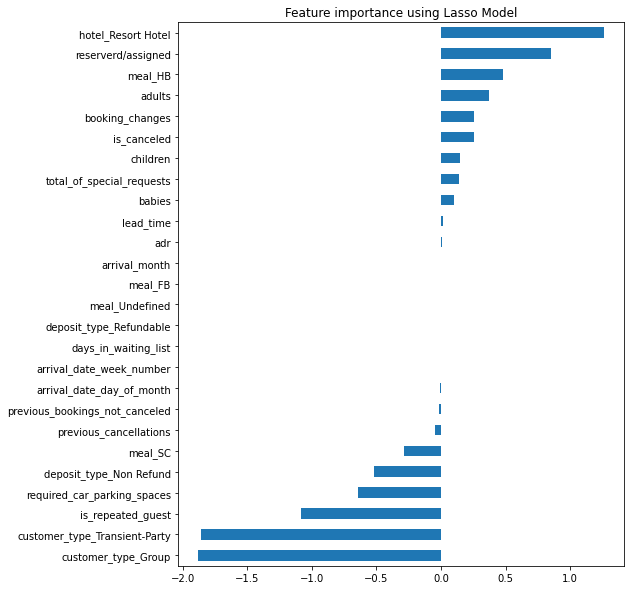

In [176]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X_train, y_train)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train))
coef = pd.Series(reg.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(np.abs(coef) > 0.25)) + " variables and eliminated the other " +  str(sum(np.abs(coef) < 0.25)) + " variables")
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [177]:
var_selected=list(coef[np.abs(coef)>0.25].index)
launch_linear_model(X_train,y_train,var_selected,verbose=0)

Intercept added
Training...
Done.


### Modelo lineal con features seleccionadas por BACKWARD ELIMINATION

In [178]:
#Backward Elimination
cols = list(X_train.columns)
pmax = 0.5
while (len(cols)>0):
    p= []
    X_1 = X_train[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y_train,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.000005):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols

In [179]:
launch_linear_model(X_train,y_train,selected_features_BE,verbose=0)

Intercept added
Training...
Done.


### Modelo mut_features

Vamos a seleccionar las variables obtenidas como representativas haciendo uso del método de mutual information, correremos el modelo lineal y graficaremos sus residuos. Además, será ampliamente comentado debido a que es el modelo con el menor numero de variables, y al hecho de que todos los modelos presentados anteriormente poseen una distribución similar en residuos y comportamiento, y por tanto, siumilares conclusiones.

Intercept added
Training...
                            OLS Regression Results                            
Dep. Variable:           stays_nights   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     139.0
Date:                Thu, 17 Dec 2020   Prob (F-statistic):          9.81e-141
Time:                        21:13:20   Log-Likelihood:                -15308.
No. Observations:                6700   AIC:                         3.063e+04
Df Residuals:                    6694   BIC:                         3.067e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------

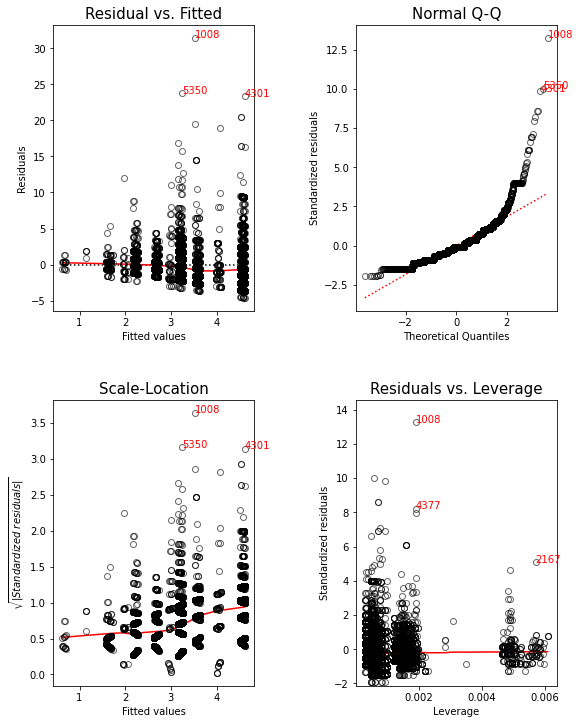

In [180]:
vars_selected=['arrival_month','deposit_type_Non Refund','is_repeated_guest','reserverd/assigned','hotel_Resort Hotel']
launch_linear_model(X_train,y_train,vars_selected,verbose=1)

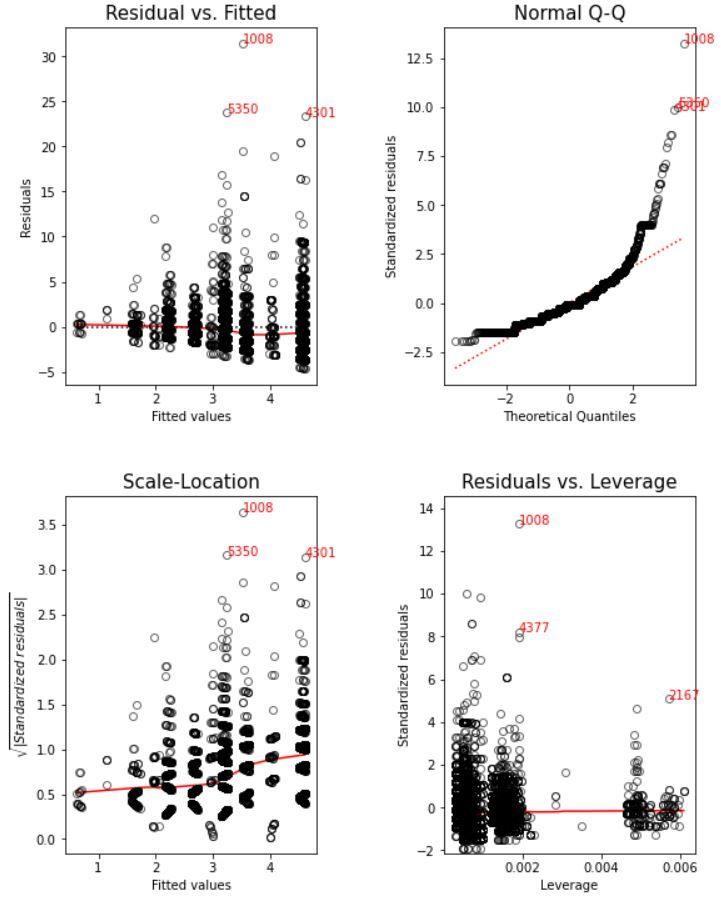

In [183]:
from IPython.display import Image
Image(filename='plot1.png')

Vamos a realizar de manera profunda la diagnosis del siguiente modelo, dado que los problemas que en el experimentamos son recurrentes a lo largo de las diferentres selecciones de variables que hemos realizado. Ademas, realizaremos la diagnosis haciendo uso de la intercepta, y eliminandola, debido al significativo cambio que el R^2 ajustado presenta.

En primer lugar, haciendo uso de la intercepta, podemos observar los siguiente:

* **R-squared**: 0.094  es una medida estadística que representa la proporción de la varianza de una variable dependiente que se explica por una o varias variables independientes en un modelo de regresión.

* **Adj. R-squared**: 0.093 nos permite comparar el poder explicativo de los modelos de regresión. Podemos observar que es muy bajo.

* **F-statistic**: 139.0 prueba la importancia general del modelo de regresión.  Específicamente, prueba la hipótesis nula de que todos los coeficientes de regresión son iguales a cero.  Esto prueba el modelo completo contra un modelo sin variables y con la estimación de la variable dependiente siendo la media de los valores de la variable dependiente.

* **Prob (F-statistic)**: 9.81e-141 es la probabilidad de que la hipótesis nula del modelo completo sea cierta (es decir, que todos los coeficientes de regresión sean cero). Este valor tan bajo implica que al menos algunos de los parámetros de regresión no son cero y que la ecuación de regresión tiene cierta validez para ajustar los datos.

Con respecto a los gráficos de residuos:

* **Residuals-Fitted**: Podemos observar heterocedasticidad en los residuos, es decir, la varianza de los errores no es constante en todas las observaciones realizadas. Esto implica el incumplimiento de una de las hipótesis básicas sobre las que se asienta el modelo de regresión lineal. De ella se deriva que los datos con los que se trabaja son heterogéneos, ya que provienen de distribuciones de probabilidad con distinta varianza.

* **Normal Q-Q**: Podemos observar que las colas se alejan de manera muy notable, de modo que los residuos no estan distribuidos de manera normal

* **Scale-Location**: Con este gráfico se corrobora que existe heterocedasticidad de los residuos

* **Residuals-Leverage**: Nos reporta nos numeros que son importantes en la gráfica, pero podemos observar que no visualizamos siquiera la distancia de Cook, de modo que ninguno de nuestros valores es influyente


Training...
                                 OLS Regression Results                                
Dep. Variable:           stays_nights   R-squared (uncentered):                   0.670
Model:                            OLS   Adj. R-squared (uncentered):              0.669
Method:                 Least Squares   F-statistic:                              2714.
Date:                Thu, 17 Dec 2020   Prob (F-statistic):                        0.00
Time:                        21:14:27   Log-Likelihood:                         -15494.
No. Observations:                6700   AIC:                                  3.100e+04
Df Residuals:                    6695   BIC:                                  3.103e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------

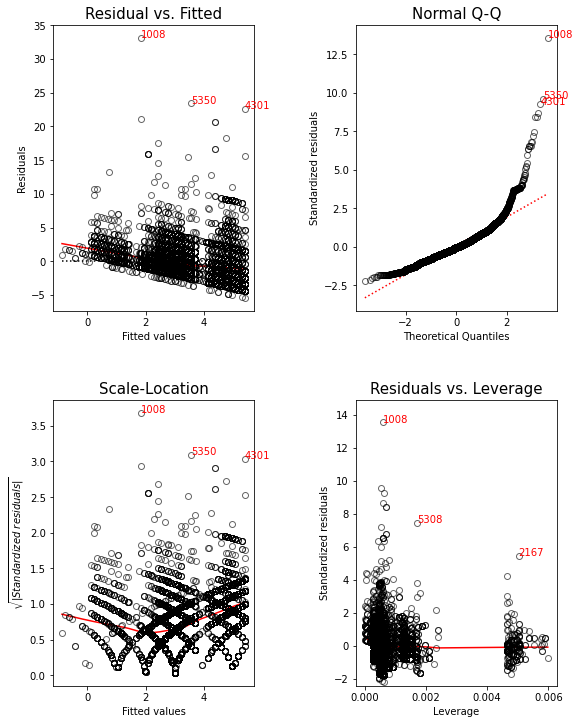

In [181]:
launch_linear_model(X_train,y_train,vars_selected,with_intercept=0,verbose=1)

In [182]:
Image(filename='plot2.png')

NameError: name 'Image' is not defined

Vamos a realizar la diagnosis del segundo modelo, haciendo uso de la intercepta y de las mismas variables que el caso anterior, debido al significativo cambio que el R^2 ajustado presenta.

Podemos observar los siguiente:

* **R-squared**:  0.670  Podemos observar que es bastante superior, lo que a priori significaría

* **Adj. R-squared**:0.669 podemos observar que es considerablemente mejor, mejorando el poder explicativo del modelo de regresión

* **F-statistic**: 2714 es mucho mayor, probando asi la importancia general del modelo de regresión a priori. 

* **Prob (F-statistic)**:  0.00 de nuevo, este valor tan bajo implica que al menos algunos de los parámetros de regresión no son cero y que la ecuación de regresión tiene cierta validez para ajustar los datos.

Con respecto a los gráficos de residuos, podemos observar las mismas cualidades que el análisis realizado anteriormente. Esto nos prueba, que aunque los estadisticos usuales de la regresion pudieran parecer mucho mejores, nuestro modelo sigue sin ser representativo para la prediccion den nuestra variable objetivo. Este caso constituye un buen ejemplo de como los estadisticos que usualmente utilizamos para la validación de modelos de regresión lineal, no siempre son válidos.